# Implémentez un modèle de scoring

In [137]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Compute the average precision score
from sklearn.metrics import average_precision_score
# Cross validation
from sklearn.model_selection import cross_val_score
# validation curve
from sklearn.model_selection import validation_curve
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# confusion Matrix
from sklearn.metrics import confusion_matrix
# Learning curve
from sklearn.model_selection import learning_curve
# Matrix confusion
from sklearn.metrics import plot_confusion_matrix

In [2]:
# List files available
print(os.listdir(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P7_OC\P7_Donnees"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'df_selected_features.csv', 'df_selected_features_100.csv', 'df_selected_features_restricted.csv', 'df_selected_features_sample.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
# Training data
app_train = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P7_OC\P7_Donnees\application_train.csv", sep = ",")
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
# Testing data features
app_test = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P7_OC\P7_Donnees\application_test.csv", sep = ",")
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

## Examine the Distribution of the Target Column

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

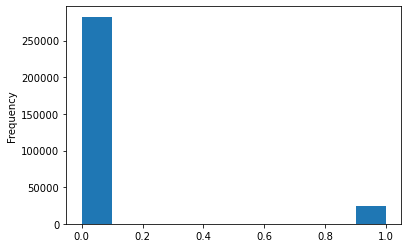

In [7]:
app_train['TARGET'].astype(int).plot.hist()

## Examine Missing Values

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    

In [9]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Column Types

In [10]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding Categorical Variables

In [12]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)


In [13]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)


## Back to Exploratory Data Analysis

### Anomalies

In [14]:
app_train['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [15]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [16]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

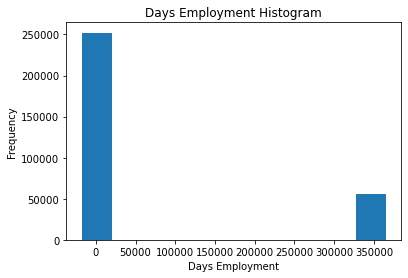

In [17]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [18]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days Employment')

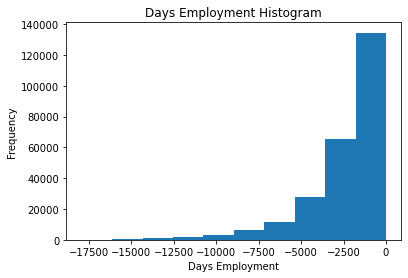

In [19]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [20]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [21]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

### Effect of Age on Repayment

In [22]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

Text(0, 0.5, 'Count')

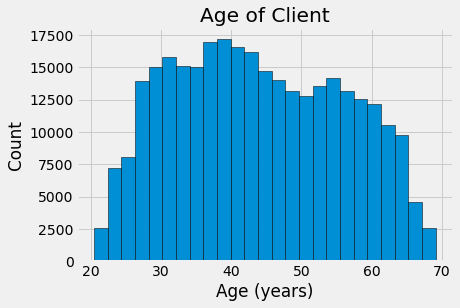

In [23]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Ages')

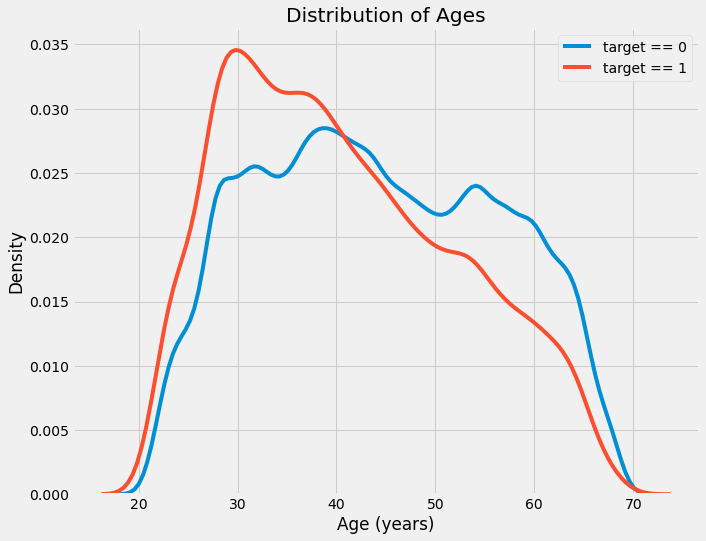

In [24]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

In [25]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [26]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

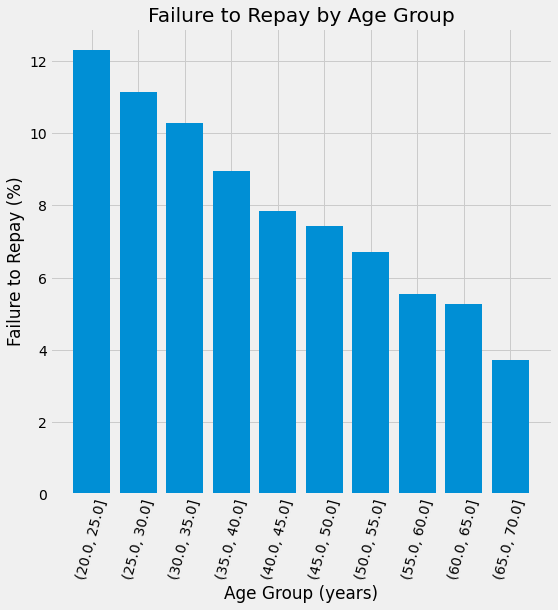

In [27]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

### Exterior Sources

In [28]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

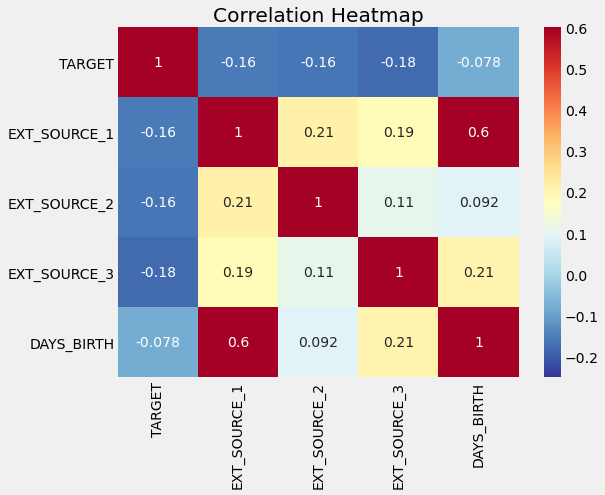

In [29]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

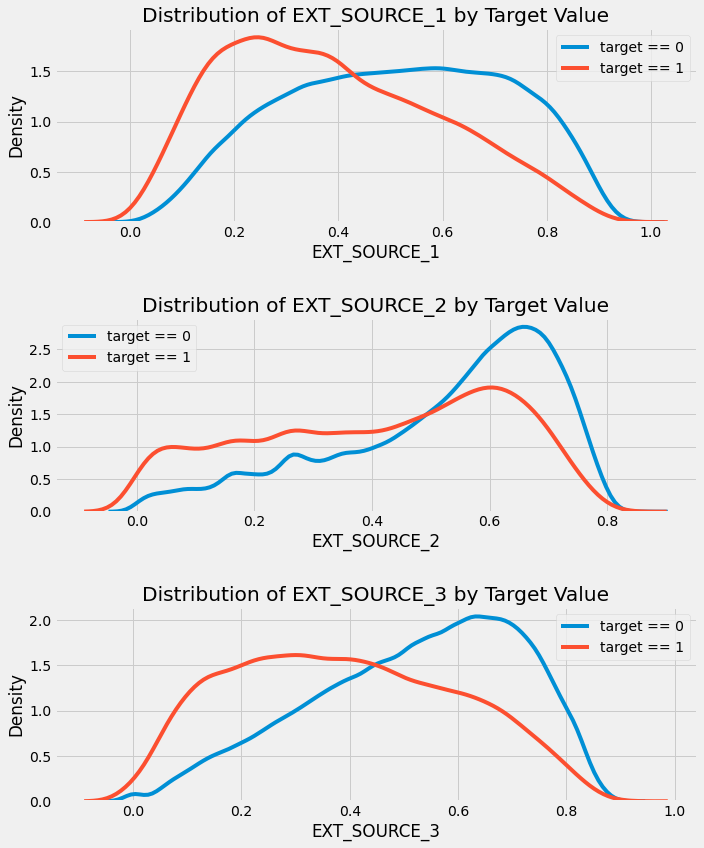

In [30]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### Pairs Plot

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

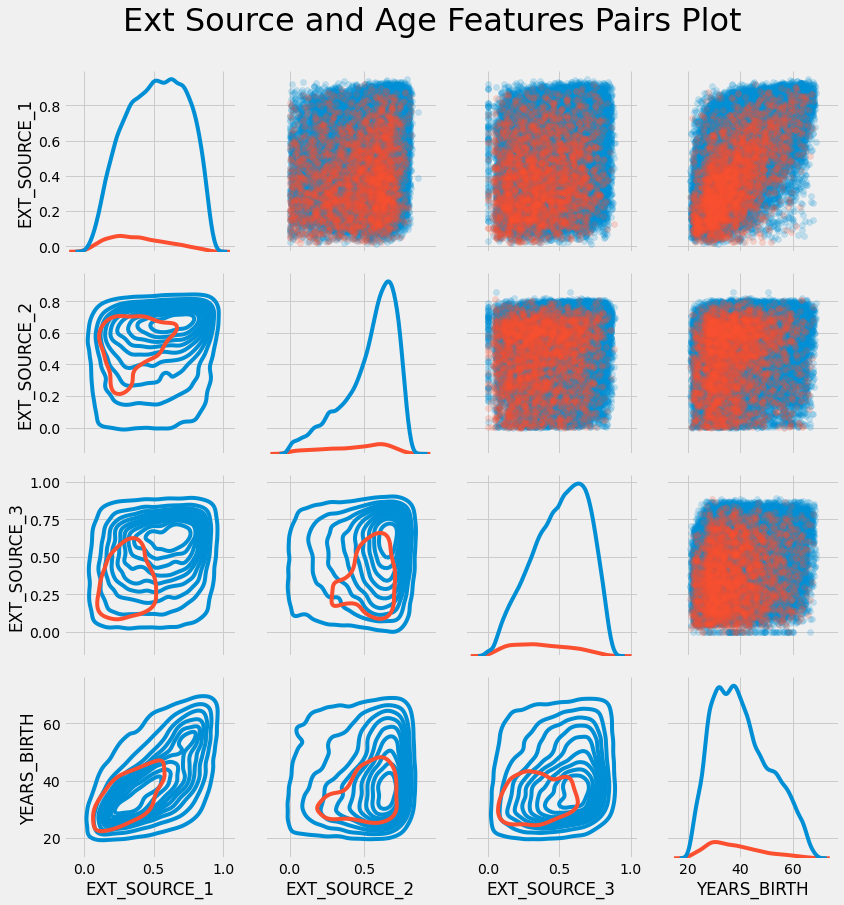

In [34]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)

## Imbalanced-Learn Library

In [35]:
# class count
Target_count_0, Target_count_1 = app_train['TARGET'].value_counts()

# Separate class
Target_0 = app_train[app_train['TARGET'] == 0]
Target_1 = app_train[app_train['TARGET'] == 1]# print the shape of the class
print('Target 0:', Target_0.shape)
print('Target 1:', Target_1.shape)

Target 0: (282686, 244)
Target 1: (24825, 244)


## Random Under-Sampling

total Target of 1 and 0: 1    24825
0    24825
Name: TARGET, dtype: int64


<AxesSubplot:title={'center':'count (Target)'}>

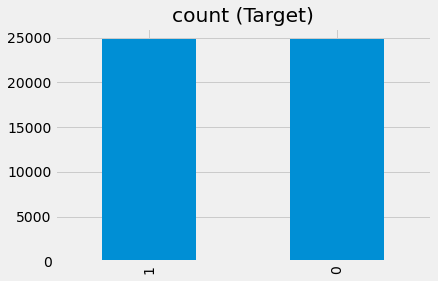

In [36]:
Target_0_under = Target_0.sample(Target_count_1)

train_under = pd.concat([Target_0_under, Target_1], axis=0)

print("total Target of 1 and 0:",train_under['TARGET'].value_counts())# plot the count after under-sampeling
train_under['TARGET'].value_counts().plot(kind='bar', title='count (Target)')

In [37]:
train_under.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
149335,273139,1,139500.0,495000.0,24750.0,495000.0,0.032561,16885,-571.0,-570.0,...,0,0,0,0,1,0,1,0,0,False
154399,278948,0,135000.0,439740.0,22581.0,315000.0,0.006852,10548,-2244.0,-4879.0,...,0,0,0,0,0,0,0,0,0,False
49351,157135,0,225000.0,1699740.0,88141.5,1575000.0,0.046220,18473,-1438.0,-6257.0,...,0,0,0,0,1,0,1,0,0,False
45033,152167,1,180000.0,1252363.5,51138.0,1152000.0,0.025164,11824,-4498.0,-3261.0,...,0,0,0,0,0,0,1,0,0,False
91705,206495,0,135000.0,270000.0,13500.0,270000.0,0.030755,17380,-2713.0,-4678.0,...,0,0,0,0,0,0,0,0,0,False


In [38]:
train_under['TARGET'].shape

(49650,)

In [39]:
app_train['TARGET'].shape

(307511,)

# Logistic Regression Implementation 

## with Random Under Sampling

In [31]:
train_lg = app_train
train_labels_lg = app_train['TARGET']

# split the data into train and test sub-datasets
trainX_lg, testX_lg, trainy_lg, testy_lg = train_test_split(train_lg, train_labels_lg, test_size=0.05, random_state=1)

# class count
Target_count_0, Target_count_1 = trainX_lg['TARGET'].value_counts()

# Separate class
Target_0 = trainX_lg[trainX_lg['TARGET'] == 0]
Target_1 = trainX_lg[trainX_lg['TARGET'] == 1]

# make the undersampling
Target_0_under = Target_0.sample(Target_count_1)
train_under = pd.concat([Target_0_under, Target_1], axis=0)

# Keep only under sample in training data
trainX_lg_rus = train_under
trainy_lg_rus = train_under['TARGET']

# Drop the target from the training and testing data
trainX_lg_rus = trainX_lg_rus.drop(columns = ['TARGET'])
testX_lg = testX_lg.drop(columns = ['TARGET'])

In [32]:
print('Training data shape: ', testX_lg.shape)

Training data shape:  (15376, 243)


In [33]:
# Mean imputation of missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(trainX_lg_rus)

# Transform both training and testing data
trainX_lg_rus = imputer.transform(trainX_lg_rus)
testX_lg = imputer.transform(testX_lg)

# Repeat with the scaler
scaler.fit(trainX_lg_rus)
trainX_lg_rus = scaler.transform(trainX_lg_rus)
testX_lg = scaler.transform(testX_lg)

In [34]:
print('Training data shape: ', trainX_lg_rus.shape)
print('Testing data shape: ', testX_lg.shape)
print('Training data shape: ', trainy_lg_rus.shape)
print('Testing data shape: ', testy_lg.shape)

Training data shape:  (47178, 243)
Testing data shape:  (15376, 243)
Training data shape:  (47178,)
Testing data shape:  (15376,)


In [35]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(trainX_lg_rus, trainy_lg_rus)

LogisticRegression(C=0.0001)

In [36]:
# Make predictions
# Make sure to select the second column only
log_reg_pred_lg_rus = log_reg.predict_proba(testX_lg)[:, 1]
print(len(log_reg_pred_lg_rus))

15376


In [37]:
df1_lg_rus = pd.DataFrame(testy_lg)
df2_lg_rus = pd.DataFrame({'TARGET_pred' : log_reg_pred_lg_rus}, index = df1_lg_rus.index )
df_lg_rus = pd.concat((df1_lg_rus['TARGET'], df2_lg_rus['TARGET_pred']), axis = 1)
df_lg_rus

,TARGET,TARGET_pred
64282,1,0.450543
94645,0,0.564140
306349,0,0.519169
258314,0,0.530522
87597,0,0.596536
...,...,...
201338,0,0.538093
144123,0,0.497288
286940,0,0.461706
229701,1,0.506725


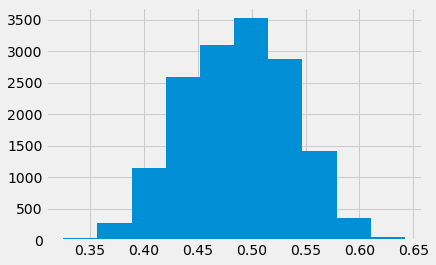

In [38]:
df_lg_rus['TARGET_pred'].hist()

In [39]:
df_lg_rus['TARGET_pred'].describe()

count    15376.000000
mean         0.487259
std          0.049852
min          0.325525
25%          0.449761
50%          0.488595
75%          0.523505
max          0.642137
Name: TARGET_pred, dtype: float64

## ROC curve 

In [40]:
# defining a python function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## ROC curve - Logistic Regression with Random Under Sampling

In [41]:
# fit a model on the train data
model = LogisticRegression(C = 0.0001)
model.fit(trainX_lg_rus, trainy_lg_rus)

LogisticRegression(C=0.0001)

In [42]:
# predict probabilities for the test data
probs_lg_rus = model.predict_proba(testX_lg)

In [43]:
# keep Probabilities of the positive class only
probs_lg_rus = probs_lg_rus[:, 1]

In [44]:
# compute the AUC Score
auc_lg_rus = roc_auc_score(testy_lg, probs_lg_rus)
print('AUC: %.2f' % auc_lg_rus)

AUC: 0.68


In [45]:
# get the ROC Curve
fpr_lg_rus, tpr_lg_rus, thresholds_lg_rus = roc_curve(testy_lg, probs_lg_rus)

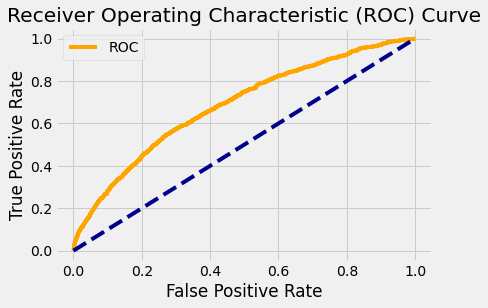

In [46]:
# plot ROC Curve using our defined function
plot_roc_curve(fpr_lg_rus, tpr_lg_rus)

# Logistic Regression Implementation without RUS

In [47]:
# Drop the target from the training data
train_lg = app_train.drop(columns = ['TARGET'])

# Feature names
features = list(train_lg.columns)

# select only from under sampled train set
train_labels_lg = app_train['TARGET']

# split the data into train and test sub-datasets
trainX_lg, testX_lg, trainy_lg, testy_lg = train_test_split(train_lg, train_labels_lg, test_size=0.3, random_state=1)

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(trainX_lg)

# Transform both training and testing data
trainX_lg = imputer.transform(trainX_lg)
testX_lg = imputer.transform(testX_lg)

# Repeat with the scaler
scaler.fit(trainX_lg)
trainX_lg = scaler.transform(trainX_lg)
testX_lg = scaler.transform(testX_lg)

print('Training data shape: ', trainX_lg.shape)
print('Testing data shape: ', testX_lg.shape)

Training data shape:  (215257, 243)
Testing data shape:  (92254, 243)


In [48]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(trainX_lg, trainy_lg)

LogisticRegression(C=0.0001)

In [49]:
# Make predictions
# Make sure to select the second column only
log_reg_pred_lg = log_reg.predict_proba(testX_lg)[:, 1]

In [50]:
df1_lg = pd.DataFrame(testy_lg)
df2_lg = pd.DataFrame({'TARGET_pred' : log_reg_pred_lg}, index = df1_lg.index )
df_lg = pd.concat((df1_lg['TARGET'], df2_lg['TARGET_pred']), axis = 1)
df_lg

,TARGET,TARGET_pred
64282,1,0.067885
94645,0,0.108233
306349,0,0.089032
258314,0,0.095551
87597,0,0.128250
...,...,...
98497,0,0.098026
205542,0,0.093298
127474,0,0.098554
46981,0,0.060805


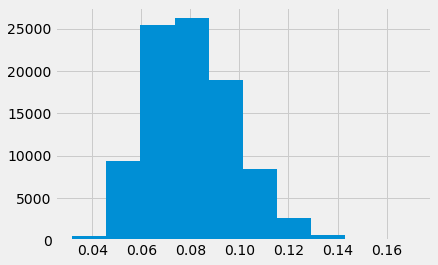

In [51]:
df_lg['TARGET_pred'].hist()

In [52]:
df_lg['TARGET_pred'].describe()

count    92254.000000
mean         0.080651
std          0.017616
min          0.031745
25%          0.067262
50%          0.079225
75%          0.092160
max          0.171130
Name: TARGET_pred, dtype: float64

## ROC curve - Logistic Regression without RUS

In [53]:
# fit a model on the train data
model = LogisticRegression(C = 0.0001)
model.fit(trainX_lg, trainy_lg)

LogisticRegression(C=0.0001)

In [54]:
# predict probabilities for the test data
probs_lg = model.predict_proba(testX_lg)

In [55]:
# keep Probabilities of the positive class only
probs_lg = probs_lg[:, 1]

In [56]:
# compute the AUC Score
auc_lg = roc_auc_score(testy_lg, probs_lg)
print('AUC: %.2f' % auc_lg)

AUC: 0.69


In [57]:
# get the ROC Curve
fpr_lg, tpr_lg, thresholds_lg = roc_curve(testy_lg, probs_lg)

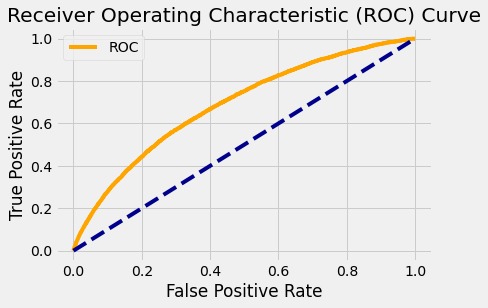

In [58]:
# plot ROC Curve using our defined function
plot_roc_curve(fpr_lg, tpr_lg)

# Random Forest 

## with Random Under Sampling

In [59]:
train_rf = app_train
train_labels_rf = app_train['TARGET']

# split the data into train and test sub-datasets
trainX_rf, testX_rf, trainy_rf, testy_rf = train_test_split(train_rf, train_labels_rf, test_size=0.05, random_state=1)

# class count
Target_count_0, Target_count_1 = trainX_rf['TARGET'].value_counts()

# Separate class
Target_0 = trainX_rf[trainX_rf['TARGET'] == 0]
Target_1 = trainX_rf[trainX_rf['TARGET'] == 1]

# make the undersampling
Target_0_under = Target_0.sample(Target_count_1)
train_under = pd.concat([Target_0_under, Target_1], axis=0)

# Keep only under sample in training data
trainX_rf_rus = train_under
trainy_rf_rus = train_under['TARGET']

# Drop the target from the training and testing data
trainX_rf_rus = trainX_rf_rus.drop(columns = ['TARGET'])
testX_rf = testX_rf.drop(columns = ['TARGET'])

In [60]:
print('Training data shape: ', testX_rf.shape)

Training data shape:  (15376, 243)


In [61]:
# Mean imputation of missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(trainX_rf_rus)

# Transform both training and testing data
trainX_rf_rus = imputer.transform(trainX_rf_rus)
testX_rf = imputer.transform(testX_rf)

# Repeat with the scaler
scaler.fit(trainX_rf_rus)
trainX_rf_rus = scaler.transform(trainX_rf_rus)
testX_rf = scaler.transform(testX_rf)

In [62]:
print('Training data shape: ', trainX_rf_rus.shape)
print('Testing data shape: ', testX_rf.shape)
print('Training data shape: ', trainy_rf_rus.shape)
print('Testing data shape: ', testy_rf.shape)

Training data shape:  (47178, 243)
Testing data shape:  (15376, 243)
Training data shape:  (47178,)
Testing data shape:  (15376,)


In [63]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [64]:
# Train on the training data
random_forest.fit(trainX_rf_rus, trainy_rf_rus)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions_rf_rus = random_forest.predict_proba(testX_rf)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [65]:
feature_importances.sort_values(by=['importance'],inplace=True, ascending=False)
FI_rf_rus = feature_importances[feature_importances.importance > 0.01]
FI_rf_rus

,feature,importance
30,EXT_SOURCE_3,0.061358
29,EXT_SOURCE_2,0.059475
8,DAYS_EMPLOYED,0.031165
7,DAYS_BIRTH,0.031066
10,DAYS_ID_PUBLISH,0.029032
28,EXT_SOURCE_1,0.028405
9,DAYS_REGISTRATION,0.028233
78,DAYS_LAST_PHONE_CHANGE,0.027831
4,AMT_ANNUITY,0.027553
3,AMT_CREDIT,0.026829


In [66]:
df1_rf_rus = pd.DataFrame(testy_rf)
df2_rf_rus = pd.DataFrame({'TARGET_pred' : predictions_rf_rus}, index = df1_rf_rus.index )
df_rf_rus = pd.concat((df1_rf_rus['TARGET'], df2_rf_rus['TARGET_pred']), axis = 1)
df_rf_rus

,TARGET,TARGET_pred
64282,1,0.15
94645,0,0.53
306349,0,0.33
258314,0,0.59
87597,0,0.59
...,...,...
201338,0,0.53
144123,0,0.39
286940,0,0.42
229701,1,0.58


In [67]:
df_rf_rus['TARGET_pred'].describe()

count    15376.000000
mean         0.448183
std          0.152861
min          0.050000
25%          0.330000
50%          0.430000
75%          0.550000
max          0.960000
Name: TARGET_pred, dtype: float64

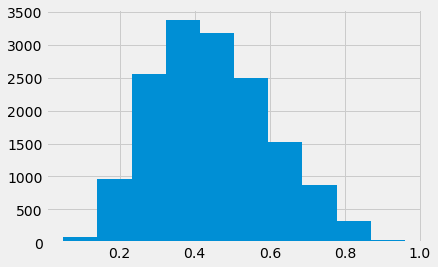

In [68]:
df_rf_rus['TARGET_pred'].hist()

## ROC curve - Random Forest

In [69]:
# fit a model on the train data
model = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
model.fit(trainX_rf_rus, trainy_rf_rus)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.6s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [70]:
# predict probabilities for the test data
probs_rf_rus = model.predict_proba(testX_rf)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [71]:
# keep Probabilities of the positive class only
probs_rf_rus = probs_rf_rus[:, 1]

In [72]:
# compute the AUC Score
auc_rf_rus = roc_auc_score(testy_rf, probs_rf_rus)
print('AUC: %.2f' % auc_rf_rus)

AUC: 0.75


In [73]:
# get the ROC Curve
fpr_rf_rus, tpr_rf_rus, thresholds_rf_rus = roc_curve(testy_rf, probs_rf_rus)

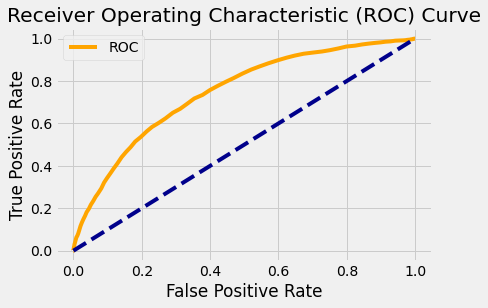

In [74]:
# plot ROC Curve using our defined function
plot_roc_curve(fpr_rf_rus, tpr_rf_rus)

## without RUS

In [75]:
# Drop the target from the training data
train_rf = app_train.drop(columns = ['TARGET'])
    
# Feature names
features = list(train_rf.columns)

# select only from under sampled train set
train_labels_rf = app_train['TARGET']

# split the data into train and test sub-datasets
trainX_rf, testX_rf, trainy_rf, testy_rf = train_test_split(train_rf, train_labels_rf, test_size=0.3, random_state=1)

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(trainX_rf)

# Transform both training and testing data
trainX_rf = imputer.transform(trainX_rf)
testX_rf = imputer.transform(testX_rf)

# Repeat with the scaler
scaler.fit(trainX_rf)
trainX_rf = scaler.transform(trainX_rf)
testX_rf = scaler.transform(testX_rf)

print('Training data shape: ', trainX_rf.shape)
print('Testing data shape: ', testX_rf.shape)

Training data shape:  (215257, 243)
Testing data shape:  (92254, 243)


In [76]:
# Train on the training data
random_forest.fit(trainX_rf, trainy_rf)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions_rf = random_forest.predict_proba(testX_rf)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.2s finished


In [77]:
feature_importances.sort_values(by=['importance'],inplace=True, ascending=False)
FI_rf = feature_importances[feature_importances.importance > 0.01]
FI_rf

,feature,importance
29,EXT_SOURCE_2,0.047537
30,EXT_SOURCE_3,0.045824
7,DAYS_BIRTH,0.031940
10,DAYS_ID_PUBLISH,0.031680
9,DAYS_REGISTRATION,0.031038
0,SK_ID_CURR,0.029746
8,DAYS_EMPLOYED,0.029233
4,AMT_ANNUITY,0.028444
78,DAYS_LAST_PHONE_CHANGE,0.027900
3,AMT_CREDIT,0.027015


In [78]:
df1_rf = pd.DataFrame(testy_rf)
df2_rf = pd.DataFrame({'TARGET_pred' : predictions_rf}, index = df1_rf.index )
df_rf = pd.concat((df1_rf['TARGET'], df2_rf['TARGET_pred']), axis = 1)
df_rf

,TARGET,TARGET_pred
64282,1,0.01
94645,0,0.05
306349,0,0.14
258314,0,0.12
87597,0,0.44
...,...,...
98497,0,0.13
205542,0,0.03
127474,0,0.07
46981,0,0.02


In [79]:
df_rf['TARGET_pred'].describe()

count    92254.000000
mean         0.089381
std          0.067634
min          0.000000
25%          0.040000
50%          0.070000
75%          0.120000
max          0.650000
Name: TARGET_pred, dtype: float64

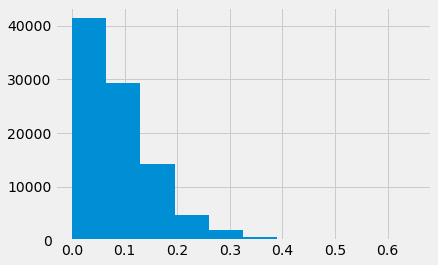

In [80]:
df_rf['TARGET_pred'].hist()

## ROC curve - Random Forest

In [81]:
# fit a model on the train data
model = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
model.fit(trainX_rf, trainy_rf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [82]:
# predict probabilities for the test data
probs_rf = model.predict_proba(testX_rf)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.0s finished


In [83]:
# keep Probabilities of the positive class only
probs_rf = probs_rf[:, 1]

In [84]:
# compute the AUC Score
auc_rf = roc_auc_score(testy_rf, probs_rf)
print('AUC: %.2f' % auc_rf)

AUC: 0.71


In [85]:
# get the ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(testy_rf, probs_rf)

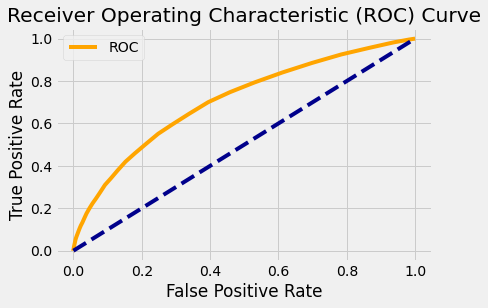

In [86]:
# plot ROC Curve using our defined function
plot_roc_curve(fpr_rf, tpr_rf)

# Random Forest with FI, with Random Under Sampling

In [87]:
selected_features = FI_rf['feature'].values
selected_features

array(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'SK_ID_CURR', 'DAYS_EMPLOYED', 'AMT_ANNUITY',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'EXT_SOURCE_1',
       'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
       'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OWN_CAR_AGE'], dtype=object)

## FI

In [88]:
df_selected_features = app_train[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'EXT_SOURCE_1', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'SK_ID_CURR',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'AMT_INCOME_TOTAL', 'HOUR_APPR_PROCESS_START',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'TARGET']]

df_selected_features.shape

(307511, 20)

In [89]:
df_selected_features.to_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P7_OC\P7_Donnees\df_selected_features.csv", index = True)

In [90]:
df_selected_features.head()

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,AMT_CREDIT,AMT_ANNUITY,SK_ID_CURR,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_YEAR,OWN_CAR_AGE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,TARGET
0,0.139376,0.262949,9461,-637.0,0.083037,-2120,-1134.0,-3648.0,406597.5,24700.5,100002,351000.0,0.018801,202500.0,10,1.0,NaN,2.0,2.0,1
1,NaN,0.622246,16765,-1188.0,0.311267,-291,-828.0,-1186.0,1293502.5,35698.5,100003,1129500.0,0.003541,270000.0,11,0.0,NaN,1.0,1.0,0
2,0.729567,0.555912,19046,-225.0,NaN,-2531,-815.0,-4260.0,135000.0,6750.0,100004,135000.0,0.010032,67500.0,9,0.0,26.0,0.0,0.0,0
3,NaN,0.650442,19005,-3039.0,NaN,-2437,-617.0,-9833.0,312682.5,29686.5,100006,297000.0,0.008019,135000.0,17,NaN,NaN,2.0,2.0,0
4,NaN,0.322738,19932,-3038.0,NaN,-3458,-1106.0,-4311.0,513000.0,21865.5,100007,513000.0,0.028663,121500.0,11,0.0,NaN,0.0,0.0,0


## Make Predictions using feature important

In [91]:
train_FI = df_selected_features

train_FI.shape

(307511, 20)

In [92]:
train = train_FI
train_labels = train_FI['TARGET']

# split the data into train and test sub-datasets
trainX, testX, trainy, testy = train_test_split(train, train_labels, test_size=0.05, random_state=1)

# class count
Target_count_0, Target_count_1 = trainX['TARGET'].value_counts()

# Separate class
Target_0 = trainX[trainX['TARGET'] == 0]
Target_1 = trainX[trainX['TARGET'] == 1]

# make the undersampling
Target_0_under = Target_0.sample(Target_count_1)
train_under = pd.concat([Target_0_under, Target_1], axis=0)

# Keep only under sample in training data
trainX = train_under
trainy = train_under['TARGET']

# Drop the target from the training and testing data
trainX = trainX.drop(columns = ['TARGET'])
testX = testX.drop(columns = ['TARGET'])

In [93]:
print('Training data shape: ', testX.shape)

Training data shape:  (15376, 19)


In [94]:
# Mean imputation of missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(trainX)

# Transform both training and testing data
trainX = imputer.transform(trainX)
testX = imputer.transform(testX)

# Repeat with the scaler
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [95]:
print('Training data shape: ', trainX.shape)
print('Testing data shape: ', testX.shape)
print('Training data shape: ', trainy.shape)
print('Testing data shape: ', testy.shape)

Training data shape:  (47178, 19)
Testing data shape:  (15376, 19)
Training data shape:  (47178,)
Testing data shape:  (15376,)


In [96]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest.fit(trainX, trainy)

# Make predictions on the test data
predictions = random_forest.predict_proba(testX)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


In [97]:
df1 = pd.DataFrame(testy)
df2 = pd.DataFrame({'TARGET_pred' : predictions}, index = df1.index )
df = pd.concat((df1['TARGET'], df2['TARGET_pred']), axis = 1)
df

,TARGET,TARGET_pred
64282,1,0.23
94645,0,0.30
306349,0,0.34
258314,0,0.42
87597,0,0.87
...,...,...
201338,0,0.56
144123,0,0.15
286940,0,0.31
229701,1,0.60


In [98]:
df.describe()

,TARGET,TARGET_pred
count,15376.000000,15376.000000
mean,0.080385,0.435924
std,0.271897,0.182298
min,0.000000,0.030000
25%,0.000000,0.290000
50%,0.000000,0.420000
75%,0.000000,0.560000
max,1.000000,0.960000


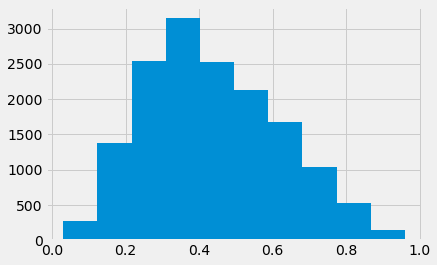

In [99]:
df['TARGET_pred'].hist()

## ROC curve - FI

In [100]:
# fit a model on the train data
model = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
model.fit(trainX, trainy)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.2s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [101]:
# predict probabilities for the test data
probs = model.predict_proba(testX)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [102]:
# keep Probabilities of the positive class only
probs = probs[:, 1]

In [103]:
# compute the AUC Score
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.74


In [104]:
# get the ROC Curve
fpr, tpr, thresholds = roc_curve(testy, probs)

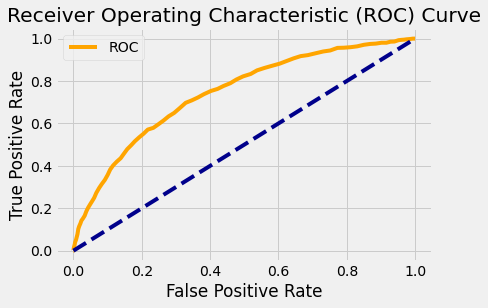

In [105]:
# plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

## Compute the average precision score

In [107]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(testy, probs)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.22


## Plot the Precision-Recall curve

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.22')

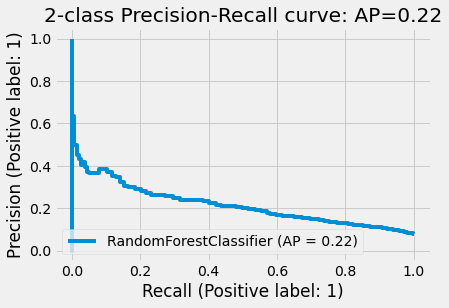

In [108]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, testX, testy)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [109]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
for i in range(len(thresholds)):
    print(precision[i], recall[i], thresholds[i])

0.08086359175662414 1.0 0.1
0.08107930672268908 0.9991909385113269 0.11
0.08128581779856399 0.9983818770226537 0.12
0.08163940938886315 0.9975728155339806 0.13
0.08204035426516615 0.9967637540453075 0.14
0.08247284430736221 0.9951456310679612 0.15
0.08293407112490721 0.9943365695792881 0.16
0.08356602874072055 0.9927184466019418 0.17
0.08405737139704868 0.9862459546925566 0.18
0.08493723849372385 0.9854368932038835 0.19
0.08558717604688934 0.9805825242718447 0.2
0.08681326552539216 0.9805825242718447 0.21
0.08794812008160886 0.9765372168284789 0.22
0.08935854653318502 0.9749190938511327 0.23
0.09077842499432635 0.970873786407767 0.24
0.09207576343254735 0.9635922330097088 0.25
0.09373271160989488 0.959546925566343 0.26
0.09563459983831851 0.9571197411003236 0.27
0.09761334544553638 0.9563106796116505 0.28
0.0989486179413261 0.9441747572815534 0.29
0.10098286509524224 0.9393203883495146 0.3
0.10291487839771102 0.9312297734627831 0.31
0.10510787387055136 0.9223300970873787 0.32
0.1076105

### Seuil de décision 
recall =  0.9
precision = 0.10
thresholds = 0.34  # le seuil de décision 
i.e. si TARGET_pred <= 0.34 => le prêt sera accordé

# Improved model Random Forest (FI, RUS)

In [110]:
print('Training data shape: ', trainX.shape)
print('Testing data shape: ', testX.shape)

Training data shape:  (47178, 19)
Testing data shape:  (15376, 19)


Text(0.5, 1.0, 'Test set')

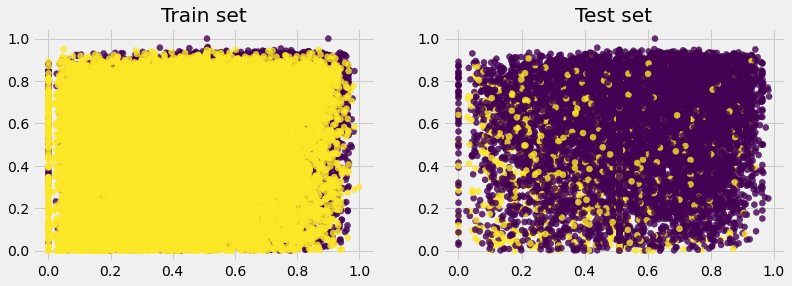

In [111]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(trainX[:, 0], trainX[:, 1], c=trainy, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(testX[:, 0], testX[:, 1],c=testy, alpha=0.8)
plt.title('Test set')

In [112]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
random_forest.fit(trainX, trainy)

print('train score:', random_forest.score(trainX, trainy))
print('test score:', random_forest.score(testX, testy))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


train score: 1.0


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


test score: 0.6875650364203955


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


## Validation Set et Cross Validation

In [113]:
random_forest = RandomForestClassifier()
cross_val_score(random_forest, trainX, trainy, cv=5, scoring='roc_auc') 

array([0.73617504, 0.73417518, 0.73413836, 0.72955738, 0.73050529])

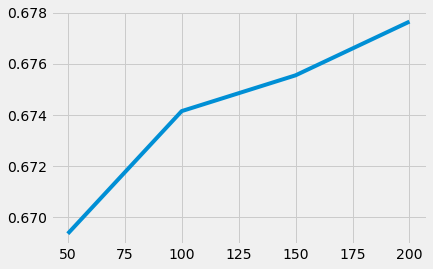

In [123]:
val_score = []
n_estimators = [50,100, 150, 200]

for k in n_estimators:
    score = cross_val_score(RandomForestClassifier(k), trainX, trainy, cv=5).mean()
    val_score.append(score)


plt.plot(n_estimators, val_score)

## Validation Curve

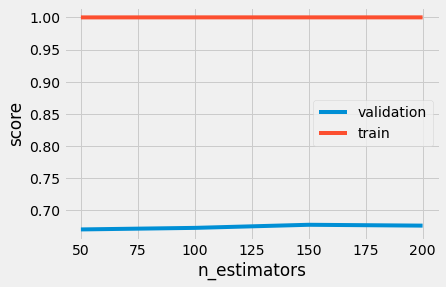

In [124]:
random_forest = RandomForestClassifier()
n_estimators = [50, 100, 150, 200]

train_score, val_score = validation_curve(random_forest, trainX, trainy,
                                          'n_estimators', n_estimators, cv=5)

plt.plot(n_estimators, val_score.mean(axis=1), label='validation')
plt.plot(n_estimators, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

## GridSearchCV

### Hyperparameter grid

In [146]:
# Number of trees in random forest
n_estimators = [50, 100, 150, 200]
# Maximum number of levels in tree
max_depth = [5, 10, 15, 20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [147]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring = 'roc_auc')

grid.fit(trainX, trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc')

In [148]:
print(grid.best_score_)
print(grid.best_params_)

0.7413018639539225
{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [149]:
model_grid = grid.best_estimator_
model_grid.score(testX, testy)

0.6806711758584808

## Best Model

In [114]:
# fit a model on the train data
Model = RandomForestClassifier(n_estimators = 200, max_depth = 15, bootstrap = True, min_samples_leaf = 4, min_samples_split = 10)
Model.fit(trainX, trainy)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

In [115]:
# predict probabilities for the test data
Probs = Model.predict_proba(testX)

In [116]:
# keep Probabilities of the positive class only
Probs = Probs[:, 1]

In [117]:
import pickle
# Save to file in the current working directory
pkl_filename = "pickle_bestmodel_bank.pkl"
with open(pkl_filename, 'wb') as file:
   pickle.dump(Model, file)

## ROC curve

In [118]:
# compute the AUC Score
auc = roc_auc_score(testy, Probs)
print('AUC: %.2f' % auc)

AUC: 0.75


In [119]:
# get the ROC Curve
fpr, tpr, thresholds = roc_curve(testy, Probs)

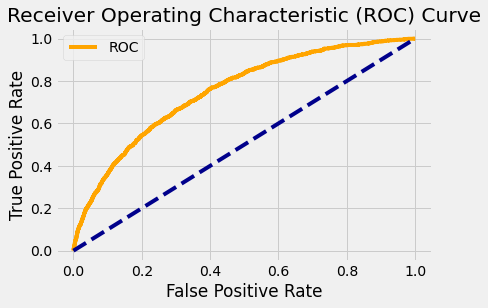

In [120]:
# plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

In [164]:
## Compute the average precision score
average_precision = average_precision_score(testy, Probs)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.22


## Plot the Precision-Recall curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.22')

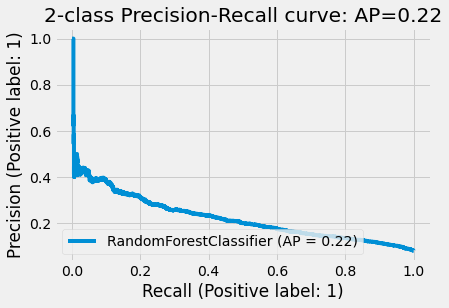

In [122]:
disp = plot_precision_recall_curve(Model, testX, testy)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Seuil de décision 

In [167]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(testy, Probs)
for i in range(len(thresholds)):
    print(precision[i], recall[i], thresholds[i])

0.08071573173120877 1.0 0.11835114028733484
0.08065569487983282 0.9991909385113269 0.11840188617295377
0.08066096270655085 0.9991909385113269 0.1184664076610883
0.08066623122142391 0.9991909385113269 0.11899547704855515
0.08067150042458685 0.9991909385113269 0.11906062182318014
0.08067677031617455 0.9991909385113269 0.1194195955800577
0.08068204089632194 0.9991909385113269 0.11955841622903352
0.08068731216516399 0.9991909385113269 0.11981848238278633
0.08069258412283567 0.9991909385113269 0.12001035997332993
0.08069785676947204 0.9991909385113269 0.12036007384747018
0.08070313010520813 0.9991909385113269 0.12043113657634093
0.08070840413017906 0.9991909385113269 0.1211751163430981
0.08071367884451996 0.9991909385113269 0.12117901414001692
0.08071895424836602 0.9991909385113269 0.12167050239151499
0.08072423034185242 0.9991909385113269 0.12219924564077246
0.0807295071251144 0.9991909385113269 0.1222517844084414
0.08073478459828724 0.9991909385113269 0.12245979810630445
0.080740062761506

0.08197701454859496 0.9983818770226537 0.15218910483154696
0.08198246080255116 0.9983818770226537 0.15219046691553426
0.08198790778021393 0.9983818770226537 0.15223071036354777
0.08199335548172758 0.9983818770226537 0.1525265487399445
0.08199880390723636 0.9983818770226537 0.1526040215481252
0.08200425305688464 0.9983818770226537 0.15264164685971437
0.08200970293081677 0.9983818770226537 0.15289049014700493
0.0820151535291772 0.9983818770226537 0.15315092917671924
0.08202060485211034 0.9983818770226537 0.15323480420228675
0.0820260568997607 0.9983818770226537 0.1535878533668296
0.08203150967227282 0.9983818770226537 0.15365865827359879
0.08203696316979125 0.9983818770226537 0.15374356764100447
0.08204241739246061 0.9983818770226537 0.15384560488533386
0.08204787234042553 0.9983818770226537 0.15391410128925048
0.08205332801383071 0.9983818770226537 0.1539470909492023
0.08205878441282086 0.9983818770226537 0.15395214955085246
0.08206424153754073 0.9983818770226537 0.1540080812745048
0.08

0.08260577568838147 0.9951456310679612 0.16591183716209457
0.08261132379609107 0.9951456310679612 0.16591966879494355
0.08261687264911338 0.9951456310679612 0.16597861611593268
0.08262242224759858 0.9951456310679612 0.16618420480300228
0.0826279725916969 0.9951456310679612 0.16621883990746983
0.08263352368155862 0.9951456310679612 0.16645620209120784
0.08263907551733406 0.9951456310679612 0.16646642066658474
0.08264462809917356 0.9951456310679612 0.16655961311296857
0.08265018142722752 0.9951456310679612 0.16663244223675552
0.0826557355016464 0.9951456310679612 0.16665469193665663
0.08266129032258064 0.9951456310679612 0.16674478570729334
0.08266684589018079 0.9951456310679612 0.16687358455690685
0.08267240220459739 0.9951456310679612 0.16692263048813982
0.08267795926598104 0.9951456310679612 0.1669898681566697
0.08268351707448239 0.9951456310679612 0.16702298877427751
0.0826890756302521 0.9951456310679612 0.1671113730164311
0.0826946349334409 0.9951456310679612 0.16722522945273924
0.0

0.08366805092245898 0.9943365695792881 0.17866944520117722
0.08367374727668846 0.9943365695792881 0.17869764938415458
0.08367944440661809 0.9943365695792881 0.1787306497031439
0.08368514231240637 0.9943365695792881 0.17874447215060027
0.08369084099421178 0.9943365695792881 0.17889433632176593
0.08369654045219287 0.9943365695792881 0.17891123137761752
0.08370224068650821 0.9943365695792881 0.17908083169594322
0.08370794169731645 0.9943365695792881 0.1792043459880846
0.08371364348477624 0.9943365695792881 0.17923061905041543
0.08371934604904632 0.9943365695792881 0.17932985145435537
0.08372504939028544 0.9943365695792881 0.17942521337115788
0.0837307535086524 0.9943365695792881 0.17947542411358713
0.08373645840430606 0.9943365695792881 0.1794983279470225
0.08374216407740528 0.9943365695792881 0.17950126430711094
0.08374787052810903 0.9943365695792881 0.17952794599618052
0.08375357775657626 0.9943365695792881 0.17953563270288747
0.083759285762966 0.9943365695792881 0.17953678732215683
0.0

0.08463820100710492 0.9927184466019418 0.19006164478218235
0.08464403973509933 0.9927184466019418 0.1900972413211416
0.08464987926871335 0.9927184466019418 0.19019065520162148
0.0846557196081137 0.9927184466019418 0.19020076445133655
0.08466156075346719 0.9927184466019418 0.1902602237786447
0.08466740270494065 0.9927184466019418 0.1902658904371037
0.08467324546270098 0.9927184466019418 0.1902669534818698
0.08467908902691511 0.9927184466019418 0.19029370632613543
0.08468493339775002 0.9927184466019418 0.1903649119153138
0.08469077857537272 0.9927184466019418 0.19041085948103872
0.0846966245599503 0.9927184466019418 0.19050743014010332
0.08470247135164986 0.9927184466019418 0.19051816687754933
0.08470831895063859 0.9927184466019418 0.19056299996653045
0.08471416735708368 0.9927184466019418 0.19060416706254202
0.08472001657115238 0.9927184466019418 0.19073923618900884
0.08472586659301201 0.9927184466019418 0.19077440608972093
0.08473171742282992 0.9927184466019418 0.19078209946095007
0.08

0.08539983282251323 0.9919093851132686 0.19628984875091632
0.0854057819575061 0.9919093851132686 0.19640227677651093
0.08541173192141563 0.9919093851132686 0.19648682314401725
0.0854176827144151 0.9919093851132686 0.1966027068284883
0.08542363433667781 0.9919093851132686 0.1966353818821234
0.08542958678837712 0.9919093851132686 0.196685793646151
0.08543554006968641 0.9919093851132686 0.19670010415427686
0.08544149418077915 0.9919093851132686 0.19671032894120727
0.08544744912182882 0.9919093851132686 0.1967394767771668
0.085453404893009 0.9919093851132686 0.19689965267666598
0.08545936149449324 0.9919093851132686 0.19691324228337634
0.08546531892645522 0.9919093851132686 0.19691421655745994
0.0854712771890686 0.9919093851132686 0.19693420527364353
0.08547723628250714 0.9919093851132686 0.19695701212434066
0.08548319620694464 0.9919093851132686 0.19696714283029454
0.08548915696255491 0.9919093851132686 0.19714792056072114
0.08549511854951186 0.9919093851132686 0.19715825908134538
0.08550

0.08655070004242682 0.9902912621359223 0.20562598101570045
0.08655682059260307 0.9902912621359223 0.2057569282391996
0.08656294200848656 0.9902912621359223 0.2057624497530745
0.08656906429026098 0.9902912621359223 0.20579205771370668
0.08657518743811006 0.9902912621359223 0.2058560421224605
0.08658131145221759 0.9902912621359223 0.205907184031772
0.0865874363327674 0.9902912621359223 0.20593939224462204
0.0865935620799434 0.9902912621359223 0.2059736842911777
0.08659968869392953 0.9902912621359223 0.2060200074244691
0.08660581617490978 0.9902912621359223 0.20605662415435608
0.086541183130484 0.9894822006472492 0.20608456453487173
0.0865473073384757 0.9894822006472492 0.20611555078472565
0.08655343241330503 0.9894822006472492 0.2061906148922841
0.08655955835515607 0.9894822006472492 0.20621972194887217
0.08656568516421291 0.9894822006472492 0.20622831577238754
0.08657181284065973 0.9894822006472492 0.20629867647675323
0.08657794138468074 0.9894822006472492 0.20632615106322238
0.08658407

0.08739255014326648 0.9870550161812298 0.21393727582964345
0.08739881080306612 0.9870550161812298 0.2139663832779225
0.08740507235993696 0.9870550161812298 0.21401776151359342
0.08741133481407179 0.9870550161812298 0.2140379575608526
0.08741759816566351 0.9870550161812298 0.21411543719761247
0.08742386241490505 0.9870550161812298 0.2141295389073222
0.0874301275619894 0.9870550161812298 0.21418944422594788
0.08743639360710959 0.9870550161812298 0.21423934043774484
0.08744266055045871 0.9870550161812298 0.2142596798196971
0.08744892839222995 0.9870550161812298 0.2142739879186156
0.08745519713261649 0.9870550161812298 0.21429990378227196
0.0874614667718116 0.9870550161812298 0.21439939950047504
0.0874677373100086 0.9870550161812298 0.21441429903304635
0.08747400874740087 0.9870550161812298 0.21444865124506926
0.08748028108418185 0.9870550161812298 0.2145586723839363
0.087486554320545 0.9870550161812298 0.21461459971330657
0.08749282845668388 0.9870550161812298 0.21462099003701338
0.087499

0.08829717768265254 0.9846278317152104 0.22058808759187692
0.08830358438543028 0.9846278317152104 0.22061267958359262
0.08830999201799579 0.9846278317152104 0.22068003314844853
0.08831640058055153 0.9846278317152104 0.22068271475273538
0.08832281007329995 0.9846278317152104 0.2207128252061203
0.08832922049644361 0.9846278317152104 0.2207362662791791
0.08833563185018509 0.9846278317152104 0.2207835565182183
0.08834204413472706 0.9846278317152104 0.22079463261059828
0.08834845735027223 0.9846278317152104 0.22082187620061647
0.08835487149702338 0.9846278317152104 0.22091087633320286
0.08836128657518333 0.9846278317152104 0.22098343775293489
0.08836770258495498 0.9846278317152104 0.22100727267026105
0.08837411952654128 0.9846278317152104 0.22102126487576026
0.08838053740014525 0.9846278317152104 0.22108419743498067
0.08838695620596994 0.9846278317152104 0.22115118054526658
0.08839337594421848 0.9846278317152104 0.2212462433716233
0.08839979661509406 0.9846278317152104 0.2212677753311252
0.

0.08902752293577981 0.9813915857605178 0.22641541210862295
0.08903405754550793 0.9813915857605178 0.2264267079153787
0.08904059311458563 0.9813915857605178 0.2264846055097929
0.0890471296432242 0.9813915857605178 0.22650754160295286
0.08905366713163497 0.9813915857605178 0.226508886074217
0.08906020558002938 0.9813915857605178 0.22654054123013098
0.08906674498861884 0.9813915857605178 0.22665970013643932
0.08907328535761493 0.9813915857605178 0.22667267136699074
0.0890798266872292 0.9813915857605178 0.22670461807493303
0.08908636897767333 0.9813915857605178 0.2267940038954727
0.08909291222915902 0.9813915857605178 0.22684347395834284
0.08909945644189804 0.9813915857605178 0.22684984537198422
0.08910600161610226 0.9813915857605178 0.22686920468104504
0.08911254775198355 0.9813915857605178 0.22687432283156483
0.08911909484975387 0.9813915857605178 0.2269063721902776
0.08912564290962527 0.9813915857605178 0.2269219324579356
0.08913219193180984 0.9813915857605178 0.22694970191321656
0.0891

0.0897626112759644 0.9789644012944984 0.23105729477830425
0.08976927071741227 0.9789644012944984 0.23106173421849718
0.08977593114705446 0.9789644012944984 0.23116606126908654
0.08978259256511092 0.9789644012944984 0.23145704751576687
0.08978925497180172 0.9789644012944984 0.2314639180828486
0.08979591836734693 0.9789644012944984 0.23151888305960389
0.08980258275196674 0.9789644012944984 0.23153723031715814
0.0898092481258814 0.9789644012944984 0.23156442766476132
0.08981591448931116 0.9789644012944984 0.2315666764252679
0.08982258184247643 0.9789644012944984 0.2315674856461477
0.08982925018559762 0.9789644012944984 0.2316168323053875
0.08976167495730937 0.9781553398058253 0.23162620221731775
0.08976833976833977 0.9781553398058253 0.23163143542301767
0.08977500556916908 0.9781553398058253 0.2316319275184808
0.08978167236001783 0.9781553398058253 0.23164102492835442
0.08978834014110658 0.9781553398058253 0.23164245230379002
0.08979500891265597 0.9781553398058253 0.23167625493623906
0.08

0.09116377678503823 0.9741100323624595 0.24011592505803758
0.09117067999394214 0.9741100323624595 0.2401176806355543
0.09117758424839076 0.9741100323624595 0.24012117060700353
0.09118448954862163 0.9741100323624595 0.2401505435031349
0.09119139589487238 0.9741100323624595 0.24019616835553792
0.0911983032873807 0.9741100323624595 0.2402370139289125
0.09120521172638436 0.9741100323624595 0.24025039330433906
0.09121212121212122 0.9741100323624595 0.24027977287747376
0.09121903174482915 0.9741100323624595 0.24028177306512571
0.09122594332474618 0.9741100323624595 0.24029058639153078
0.09123285595211032 0.9741100323624595 0.24031297475868021
0.09123976962715974 0.9741100323624595 0.2403513825333087
0.09124668435013263 0.9741100323624595 0.24037283089505926
0.09125360012126724 0.9741100323624595 0.24040729594496382
0.09126051694080194 0.9741100323624595 0.24040740105571246
0.09126743480897513 0.9741100323624595 0.24043137104027124
0.09127435372602533 0.9741100323624595 0.24046657550848002
0.

0.09236084452975048 0.9733009708737864 0.2457003192086842
0.09236793611793612 0.9733009708737864 0.2457511796339839
0.09237502879520848 0.9733009708737864 0.24578708351823966
0.09238212256181846 0.9733009708737864 0.24579963779559372
0.09238921741801705 0.9733009708737864 0.2458474790350105
0.09231950844854071 0.9724919093851133 0.24592876101782973
0.0923265995852216 0.9724919093851133 0.24596708479557486
0.09233369181133814 0.9724919093851133 0.2460063272272541
0.09234078512714143 0.9724919093851133 0.2460132767365982
0.0923478795328826 0.9724919093851133 0.24603276243930278
0.0923549750288129 0.9724919093851133 0.24603417161340782
0.09236207161518364 0.9724919093851133 0.2460561387792667
0.09236916929224621 0.9724919093851133 0.24606909227958162
0.09237626806025208 0.9724919093851133 0.24607553472182236
0.09238336791945277 0.9724919093851133 0.2460784437278348
0.09239046887009993 0.9724919093851133 0.24609355385924206
0.09239757091244523 0.9724919093851133 0.24614052479533222
0.09240

0.09333644714307955 0.9700647249190939 0.25161191019532203
0.09334371350720125 0.9700647249190939 0.2516213749660372
0.09335098100280287 0.9700647249190939 0.2517069944012179
0.09335824963014872 0.9700647249190939 0.2517333437966047
0.09336551938950319 0.9700647249190939 0.25179646671409556
0.09337279028113075 0.9700647249190939 0.25180549751290426
0.09338006230529595 0.9700647249190939 0.2518319506164953
0.09338733546226341 0.9700647249190939 0.25196545949524113
0.09339460975229787 0.9700647249190939 0.2519764445155067
0.0934018851756641 0.9700647249190939 0.25200410838664966
0.09340916173262699 0.9700647249190939 0.2520474999064069
0.0934164394234515 0.9700647249190939 0.2520884848793256
0.09342371824840268 0.9700647249190939 0.2520916637747662
0.09343099820774566 0.9700647249190939 0.2520980338844412
0.09343827930174564 0.9700647249190939 0.25215492755305613
0.09344556153066791 0.9700647249190939 0.25217356530955065
0.09345284489477787 0.9700647249190939 0.2522828954675094
0.0934601

0.09446895682319571 0.9700647249190939 0.2562209409966818
0.09447640059884958 0.9700647249190939 0.25622641731292767
0.09448384554767533 0.9700647249190939 0.25624060848366376
0.09449129166995035 0.9700647249190939 0.25628262373201655
0.09449873896595208 0.9700647249190939 0.2562978195838904
0.09450618743595807 0.9700647249190939 0.2563379075718433
0.09451363708024595 0.9700647249190939 0.2563858119626466
0.09452108789909341 0.9700647249190939 0.256390990536153
0.0945285398927783 0.9700647249190939 0.2564662811626597
0.09453599306157849 0.9700647249190939 0.2565457088999604
0.09454344740577196 0.9700647249190939 0.2566018975731484
0.09455090292563678 0.9700647249190939 0.2566030939533287
0.09455835962145111 0.9700647249190939 0.2566539067039698
0.09456581749349317 0.9700647249190939 0.25665598158496356
0.09457327654204133 0.9700647249190939 0.2566716927440151
0.09458073676737398 0.9700647249190939 0.25668848479034123
0.09458819816976964 0.9700647249190939 0.2567290405929888
0.094595660

0.09577870163095618 0.9692556634304207 0.2620542640415473
0.09578635963860238 0.9692556634304207 0.2621001091999347
0.09579401887094195 0.9692556634304207 0.26224338169093764
0.09580167932826869 0.9692556634304207 0.26224647157553027
0.09580934101087651 0.9692556634304207 0.26242968731423433
0.09581700391905942 0.9692556634304207 0.26243261953435737
0.0958246680531115 0.9692556634304207 0.2624534031009718
0.09583233341332693 0.9692556634304207 0.2624982539018098
0.09584 0.9692556634304207 0.2625273179207227
0.09584766781342507 0.9692556634304207 0.2625456140499089
0.09585533685389662 0.9692556634304207 0.26257180709732714
0.09586300712170921 0.9692556634304207 0.2625909933981885
0.09587067861715749 0.9692556634304207 0.26263228687212703
0.09587835134053621 0.9692556634304207 0.26268321881713924
0.09588602529214023 0.9692556634304207 0.2627321524036477
0.09589370047226446 0.9692556634304207 0.26275207003010315
0.09590137688120397 0.9692556634304207 0.2627578060400224
0.09590905451925387

0.0967715834614451 0.9676375404530745 0.2670749235962576
0.0967794141446836 0.9676375404530745 0.26710708171209063
0.09678724609533058 0.9676375404530745 0.2671311062220913
0.09679507931369376 0.9676375404530745 0.2671661397363737
0.09680291380008094 0.9676375404530745 0.26721750105443165
0.09681074955480007 0.9676375404530745 0.2672180147238855
0.09681858657815916 0.9676375404530745 0.2672445135531438
0.09682642487046632 0.9676375404530745 0.2672608866488427
0.09683426443202979 0.9676375404530745 0.2673030305099567
0.0968421052631579 0.9676375404530745 0.2673082223033402
0.09684994736415904 0.9676375404530745 0.2673699254136319
0.09685779073534176 0.9676375404530745 0.2674199000079676
0.09686563537701466 0.9676375404530745 0.2674668519636927
0.09687348128948647 0.9676375404530745 0.26747523971123766
0.09688132847306602 0.9676375404530745 0.2675012587511734
0.09688917692806222 0.9676375404530745 0.26750456891693053
0.09689702665478409 0.9676375404530745 0.2675544309290438
0.09690487765

0.09804407031443427 0.9611650485436893 0.27402227399418144
0.09805216242984484 0.9611650485436893 0.2740281803384648
0.09806025588113908 0.9611650485436893 0.2740721805322467
0.09806835066864784 0.9611650485436893 0.2741188974874844
0.09807644679270205 0.9611650485436893 0.2742621034185846
0.09808454425363276 0.9611650485436893 0.27432434567352454
0.09809264305177112 0.9611650485436893 0.27434669517113797
0.0981007431874484 0.9611650485436893 0.27437375704091166
0.09810884466099595 0.9611650485436893 0.2743840723065017
0.09803435744962008 0.9603559870550162 0.27442636704708456
0.09804245477822747 0.9603559870550162 0.2744273836830004
0.09805055344457293 0.9603559870550162 0.2744871568686583
0.09805865344898802 0.9603559870550162 0.27449391179104315
0.09806675479180436 0.9603559870550162 0.274568003340954
0.09807485747335372 0.9603559870550162 0.27458470984761646
0.09808296149396793 0.9603559870550162 0.274607262979588
0.098091066853979 0.9603559870550162 0.2746307313359895
0.0980991735

0.09967113584619276 0.9563106796116505 0.28152288236327555
0.0996795412379828 0.9563106796116505 0.2815569081020134
0.09968794804756684 0.9563106796116505 0.2815587149732486
0.09969635627530364 0.9563106796116505 0.28168242590101494
0.09970476592155209 0.9563106796116505 0.28168380335913795
0.09971317698667116 0.9563106796116505 0.2817258582947786
0.09972158947102 0.9563106796116505 0.28176052880440083
0.09973000337495781 0.9563106796116505 0.2818042548208619
0.09973841869884398 0.9563106796116505 0.2818803920494988
0.09974683544303797 0.9563106796116505 0.2818948059106421
0.0997552536078994 0.9563106796116505 0.2819566424436102
0.09976367319378798 0.9563106796116505 0.28197437388818286
0.09977209420106356 0.9563106796116505 0.28199809482022076
0.09978051663008611 0.9563106796116505 0.28204062448306666
0.0997889404812157 0.9563106796116505 0.28204976663701653
0.09979736575481256 0.9563106796116505 0.2820975113154857
0.09980579245123702 0.9563106796116505 0.282123142065905
0.09981422057

0.10156923607518538 0.9530744336569579 0.29100733011754865
0.10157799430887299 0.9530744336569579 0.29100840624394664
0.10158675405312177 0.9530744336569579 0.2910496933552886
0.10159551530832256 0.9530744336569579 0.2910766871391381
0.10160427807486631 0.9530744336569579 0.29107914457805406
0.10161304235314414 0.9530744336569579 0.291109250863238
0.10162180814354728 0.9530744336569579 0.2911116554893311
0.10163057544646709 0.9530744336569579 0.29112103399782163
0.10163934426229508 0.9530744336569579 0.29115436331226
0.1016481145914229 0.9530744336569579 0.2911624700785733
0.10165688643424232 0.9530744336569579 0.2911657067299223
0.10166565979114525 0.9530744336569579 0.29117032926233566
0.10167443466252374 0.9530744336569579 0.2911861971752306
0.10168321104876996 0.9530744336569579 0.29121706822543897
0.10169198895027624 0.9530744336569579 0.2912276291903262
0.10170076836743504 0.9530744336569579 0.291276448193621
0.10170954930063893 0.9530744336569579 0.2913486029725464
0.10171833175

0.10236151347555088 0.9433656957928802 0.29735746651051403
0.10237050043898156 0.9433656957928802 0.29739745597242984
0.10237948898059532 0.9433656957928802 0.2974225273046308
0.10238847910080787 0.9433656957928802 0.29742458001679517
0.10239747080003513 0.9433656957928802 0.2974379713866428
0.10240646407869314 0.9433656957928802 0.29752465919832327
0.10241545893719807 0.9433656957928802 0.2975640453772661
0.10242445537596627 0.9433656957928802 0.2975979834627483
0.10243345339541421 0.9433656957928802 0.2976010279433255
0.10244245299595853 0.9433656957928802 0.2976091752638421
0.10245145417801599 0.9433656957928802 0.2976125518718208
0.10246045694200351 0.9433656957928802 0.29767651525013017
0.10246946128833817 0.9433656957928802 0.29767925736512246
0.10247846721743716 0.9433656957928802 0.29769019726843465
0.10248747472971785 0.9433656957928802 0.2977357533758308
0.10249648382559776 0.9433656957928802 0.29775525112862794
0.10250549450549451 0.9433656957928802 0.29775821117521095
0.102

0.10375591042911946 0.9409385113268608 0.30250853776155884
0.10376516773733048 0.9409385113268608 0.3025427950773063
0.10377442669759972 0.9409385113268608 0.3025557021150227
0.10378368731036945 0.9409385113268608 0.3026102609954031
0.10379294957608211 0.9409385113268608 0.3026158072986809
0.10380221349518029 0.9409385113268608 0.30263233386672894
0.10381147906810675 0.9409385113268608 0.3026513059095738
0.10382074629530441 0.9409385113268608 0.30267803194776527
0.10383001517721632 0.9409385113268608 0.30275277142390744
0.10383928571428572 0.9409385113268608 0.3027823414686036
0.10384855790695598 0.9409385113268608 0.3028002567386027
0.10385783175567065 0.9409385113268608 0.3028034472446652
0.10386710726087345 0.9409385113268608 0.3028255409322793
0.10387638442300821 0.9409385113268608 0.30283003967185257
0.10388566324251898 0.9409385113268608 0.30287429510817754
0.10389494371984992 0.9409385113268608 0.30287527708398243
0.10390422585544537 0.9409385113268608 0.3028802673264716
0.10391

0.10546518004021203 0.9336569579288025 0.30994945607417596
0.1054748194863358 0.9336569579288025 0.30996789186170487
0.10548446069469836 0.9336569579288025 0.30998202979341405
0.10549410366578298 0.9336569579288025 0.30998817089093134
0.10550374840007314 0.9336569579288025 0.3100071674402289
0.10551339489805248 0.9336569579288025 0.31002896200142427
0.10552304316020483 0.9336569579288025 0.3100404733162803
0.10553269318701418 0.9336569579288025 0.31006525932132556
0.1055423449789647 0.9336569579288025 0.3100752925838462
0.10555199853654075 0.9336569579288025 0.31012182843392483
0.10556165386022685 0.9336569579288025 0.3102172711631021
0.10557131095050773 0.9336569579288025 0.3103841269989968
0.10558096980786826 0.9336569579288025 0.31043269756856157
0.10559063043279349 0.9336569579288025 0.310490218760347
0.10560029282576867 0.9336569579288025 0.3104977762149456
0.10560995698727922 0.9336569579288025 0.3105076345122403
0.10561962291781073 0.9336569579288025 0.31051960021844494
0.105629

0.10838795478293911 0.9231391585760518 0.3229320410106719
0.10839825194755842 0.9231391585760518 0.32293728097014457
0.10840855106888361 0.9231391585760518 0.32295305842523336
0.10841885214747245 0.9231391585760518 0.32296753153510704
0.10842915518388292 0.9231391585760518 0.3230376080398507
0.10843946017867326 0.9231391585760518 0.32304989927150934
0.10844976713240187 0.9231391585760518 0.3230667760869678
0.10846007604562738 0.9231391585760518 0.32322290890433014
0.10847038691890865 0.9231391585760518 0.32323862822990207
0.10848069975280472 0.9231391585760518 0.3232523124833813
0.10849101454787487 0.9231391585760518 0.3232576019977036
0.10850133130467858 0.9231391585760518 0.32336804479166514
0.10851165002377555 0.9231391585760518 0.32340567569754136
0.1085219707057257 0.9231391585760518 0.32341628494821534
0.10853229335108913 0.9231391585760518 0.32342222543884835
0.10854261796042618 0.9231391585760518 0.32346286528491924
0.1085529445342974 0.9231391585760518 0.32349112100830746
0.10

0.10954541067464531 0.9182847896440129 0.32822824447418014
0.10955598455598456 0.9182847896440129 0.3282450873717046
0.10956656047881069 0.9182847896440129 0.32827661645275497
0.109577138443715 0.9182847896440129 0.328278352213312
0.10958771845128898 0.9182847896440129 0.32829065431133847
0.10959830050212437 0.9182847896440129 0.3283188945015496
0.10960888459681313 0.9182847896440129 0.32833887862211875
0.10961947073594747 0.9182847896440129 0.3283723994917818
0.10963005892011977 0.9182847896440129 0.3283833255134223
0.10964064914992272 0.9182847896440129 0.3283931077967946
0.10965124142594919 0.9182847896440129 0.328465171295161
0.10966183574879228 0.9182847896440129 0.3285187473679659
0.10967243211904532 0.9182847896440129 0.3285364508095114
0.1096830305373019 0.9182847896440129 0.32853858892800614
0.1096936310041558 0.9182847896440129 0.3285457630445257
0.10970423352020105 0.9182847896440129 0.3285946164744176
0.10961817303044949 0.9174757281553398 0.3286104468744606
0.1096287703016

0.1108495193250932 0.9142394822006472 0.33355704606327125
0.1108603943883057 0.9142394822006472 0.3335670962568904
0.1108712715855573 0.9142394822006472 0.33360042000644863
0.1108821509174762 0.9142394822006472 0.3336142435407151
0.11089303238469088 0.9142394822006472 0.3336315321485319
0.11090391598783002 0.9142394822006472 0.3336578059352561
0.11091480172752258 0.9142394822006472 0.33369263389664583
0.11092568960439776 0.9142394822006472 0.3337161735576268
0.11093657961908501 0.9142394822006472 0.3337424503737381
0.11094747177221403 0.9142394822006472 0.33381472583659205
0.11095836606441477 0.9142394822006472 0.3338152815704408
0.11096926249631739 0.9142394822006472 0.3338561073792562
0.11098016106855235 0.9142394822006472 0.3338668732179235
0.11099106178175032 0.9142394822006472 0.33386929282326117
0.11100196463654224 0.9142394822006472 0.33388121536815163
0.11101286963355929 0.9142394822006472 0.33389620203409637
0.11102377677343289 0.9142394822006472 0.3339022842957786
0.111034686

0.11218587953729557 0.9101941747572816 0.33935360849037854
0.1121970679166251 0.9101941747572816 0.3393838252480721
0.11220825852782765 0.9101941747572816 0.339402788853642
0.11221945137157108 0.9101941747572816 0.3394578297066321
0.11223064644852354 0.9101941747572816 0.33949040307264333
0.11224184375935349 0.9101941747572816 0.3395038072000922
0.1122530433047296 0.9101941747572816 0.3395293321994303
0.11226424508532083 0.9101941747572816 0.3396107417506393
0.1122754491017964 0.9101941747572816 0.3396408611885758
0.11228665535482583 0.9101941747572816 0.3396647833875916
0.11229786384507885 0.9101941747572816 0.3396779158366655
0.11220924428471599 0.9093851132686084 0.33971448238491453
0.112120607028754 0.9085760517799353 0.3397162746678942
0.11213180229655517 0.9085760517799353 0.33980572856130153
0.11214299980027961 0.9085760517799353 0.33982736239639477
0.11215419954059723 0.9085760517799353 0.33986154790270606
0.11216540151817819 0.9085760517799353 0.3399179493036343
0.112176605733

0.11327451576919177 0.9037216828478964 0.34506631411773986
0.11328600405679513 0.9037216828478964 0.34507016455344863
0.11329749467491632 0.9037216828478964 0.34507174775674065
0.11330898762426456 0.9037216828478964 0.3450764049098472
0.11332048290554936 0.9037216828478964 0.34507743488599535
0.11333198051948051 0.9037216828478964 0.3451081258653702
0.11334348046676813 0.9037216828478964 0.3451294238381664
0.11335498274812258 0.9037216828478964 0.3451610061480296
0.11336648736425455 0.9037216828478964 0.34516849439014285
0.11337799431587495 0.9037216828478964 0.34526904229997357
0.11338950360369505 0.9037216828478964 0.3452707318828487
0.1134010152284264 0.9037216828478964 0.3452763279713759
0.11341252919078079 0.9037216828478964 0.3452782745140121
0.11342404549147035 0.9037216828478964 0.34534012997888747
0.11343556413120748 0.9037216828478964 0.345340924411221
0.11344708511070485 0.9037216828478964 0.3453447126183542
0.11345860843067547 0.9037216828478964 0.34534685232956003
0.113470

0.11467273291283218 0.8972491909385113 0.35122035931543877
0.11468459152016545 0.8972491909385113 0.3512271638190084
0.11469645258041163 0.8972491909385113 0.35129462403228523
0.11470831609433181 0.8972491909385113 0.3513006285191683
0.1147201820626875 0.8972491909385113 0.3513929039353529
0.11473205048624043 0.8972491909385113 0.3513969391122961
0.11474392136575272 0.8972491909385113 0.35141662453387945
0.11475579470198675 0.8972491909385113 0.35142176320491125
0.11476767049570527 0.8972491909385113 0.35152557899780396
0.1147795487476713 0.8972491909385113 0.35155311270992484
0.11479142945864818 0.8972491909385113 0.35159209062813224
0.11480331262939959 0.8972491909385113 0.35169724018543924
0.11481519826068952 0.8972491909385113 0.3516993311348354
0.11482708635328226 0.8972491909385113 0.35175185056678104
0.11483897690794242 0.8972491909385113 0.3517555882581879
0.11485086992543496 0.8972491909385113 0.3517898998655924
0.11475919212843086 0.8964401294498382 0.3517923718627993
0.11477

0.1158005249343832 0.8923948220064725 0.35573396078036223
0.11581268374632507 0.8923948220064725 0.3557343196914335
0.11582484511183451 0.8923948220064725 0.3557990331389758
0.11583700903171602 0.8923948220064725 0.3558129946898271
0.1158491755067745 0.8923948220064725 0.35582088414706176
0.11586134453781513 0.8923948220064725 0.35585089719538493
0.11587351612564345 0.8923948220064725 0.35588933547793117
0.11588569027106535 0.8923948220064725 0.3559419045144402
0.11589786697488705 0.8923948220064725 0.355946977683189
0.1159100462379151 0.8923948220064725 0.3560099149145421
0.11592222806095638 0.8923948220064725 0.3560435850567977
0.1158293041833088 0.8915857605177994 0.35611915363248203
0.11584148007989067 0.8915857605177994 0.35627002334271823
0.11585365853658537 0.8915857605177994 0.35634458185962536
0.1158658395542004 0.8915857605177994 0.3564019229044781
0.11587802313354365 0.8915857605177994 0.356453783118438
0.11589020927542329 0.8915857605177994 0.35648651989837055
0.11590239798

0.11759665845560673 0.8883495145631068 0.3622291821301414
0.11760925449871465 0.8883495145631068 0.3622551126072881
0.11762185324049276 0.8883495145631068 0.36229851029652976
0.11763445468180844 0.8883495145631068 0.3623891063199238
0.11764705882352941 0.8883495145631068 0.3624304650945744
0.11765966566652379 0.8883495145631068 0.36245610969617154
0.11767227521166006 0.8883495145631068 0.36246553724861696
0.11768488745980707 0.8883495145631068 0.36251653910706955
0.11769750241183406 0.8883495145631068 0.3625348007911079
0.11771012006861063 0.8883495145631068 0.3625535102774584
0.11772274043100675 0.8883495145631068 0.36255476810157994
0.11773536349989278 0.8883495145631068 0.3625890337985031
0.11774798927613941 0.8883495145631068 0.3625969264020976
0.11776061776061776 0.8883495145631068 0.3626072180421307
0.11777324895419929 0.8883495145631068 0.36265185069710115
0.11778588285775585 0.8883495145631068 0.36265760448723555
0.11779851947215964 0.8883495145631068 0.3626748345318343
0.11781

0.11901385404167121 0.8826860841423948 0.3677632085168153
0.11902683831551386 0.8826860841423948 0.3677956154933981
0.11903982542280414 0.8826860841423948 0.3678147028766196
0.11905281536446967 0.8826860841423948 0.36781486998505963
0.1190658081414384 0.8826860841423948 0.3678560020573919
0.11907880375463872 0.8826860841423948 0.367877739923279
0.11909180220499946 0.8826860841423948 0.36788728481189586
0.11910480349344978 0.8826860841423948 0.36795311930903923
0.11911780762091931 0.8826860841423948 0.36805669451030737
0.11913081458833806 0.8826860841423948 0.3680889481736295
0.11903461832477885 0.8818770226537217 0.36815086934307045
0.11904761904761904 0.8818770226537217 0.36816910627125293
0.1190606226105953 0.8818770226537217 0.3682292592193144
0.11907362901463842 0.8818770226537217 0.3682542615062608
0.11908663826067956 0.8818770226537217 0.36826845961674964
0.11899038461538461 0.8810679611650486 0.36828421449113025
0.11900338760791171 0.8810679611650486 0.3683157085433582
0.1190163

0.12007567326953038 0.8729773462783171 0.3732681343713288
0.12008903728436282 0.8729773462783171 0.37327916233142955
0.12010240427426536 0.8729773462783171 0.37328935888653125
0.12011577424023155 0.8729773462783171 0.37330366547636873
0.1201291471832554 0.8729773462783171 0.373310107295265
0.12003117692907249 0.872168284789644 0.373349800312026
0.1200445434298441 0.872168284789644 0.37337782483503845
0.1200579129078962 0.872168284789644 0.3734506002291774
0.12007128536422365 0.872168284789644 0.37348958601048443
0.12008466079982176 0.872168284789644 0.37350364765118294
0.12009803921568628 0.872168284789644 0.37361906111587406
0.12011142061281337 0.872168284789644 0.37363062522227053
0.12012480499219969 0.872168284789644 0.37367398504982646
0.1201381923548423 0.872168284789644 0.3737060600632081
0.12015158270173874 0.872168284789644 0.3737341694293843
0.12016497603388697 0.872168284789644 0.3737957065997224
0.1201783723522854 0.872168284789644 0.37379934485811767
0.12019177165793288 0.8

0.12150170648464163 0.8640776699029126 0.37937505778268643
0.12151553077710775 0.8640776699029126 0.3794551176184311
0.12152935821574874 0.8640776699029126 0.379458124486757
0.12154318880163878 0.8640776699029126 0.37947692090531304
0.12155702253585249 0.8640776699029126 0.37947880963140945
0.121570859419465 0.8640776699029126 0.3795077317666847
0.12158469945355191 0.8640776699029126 0.3795096282736896
0.12159854263918934 0.8640776699029126 0.37959704272236566
0.12161238897745388 0.8640776699029126 0.3796000931876303
0.12162623846942262 0.8640776699029126 0.3796019181459754
0.12164009111617312 0.8640776699029126 0.37961883509478683
0.12165394691878346 0.8640776699029126 0.37962162137456623
0.12166780587833219 0.8640776699029126 0.3796642600456457
0.12168166799589837 0.8640776699029126 0.37968159963322806
0.12169553327256154 0.8640776699029126 0.3797368183851739
0.12170940170940171 0.8640776699029126 0.3797526556685051
0.12172327330749944 0.8640776699029126 0.3797618534895213
0.12173714

0.12307692307692308 0.86084142394822 0.38391641449134634
0.12309116149930588 0.86084142394822 0.3839188930393225
0.12310540321647576 0.86084142394822 0.38394050166093285
0.12311964822957648 0.86084142394822 0.3839698419568445
0.12313389653975235 0.86084142394822 0.3839727401322678
0.12314814814814815 0.86084142394822 0.38402359890650933
0.12316240305590925 0.86084142394822 0.38405588557413783
0.12317666126418152 0.86084142394822 0.38407581262268997
0.12319092277411138 0.86084142394822 0.38410402240818237
0.12320518758684576 0.86084142394822 0.38414646279533143
0.12321945570353214 0.86084142394822 0.3841590814866814
0.1232337271253185 0.86084142394822 0.3841660299718035
0.12324800185335341 0.86084142394822 0.3841674103404707
0.12326227988878591 0.86084142394822 0.3841816515858809
0.12327656123276562 0.86084142394822 0.3842475295018986
0.12329084588644264 0.86084142394822 0.38427978915828626
0.12330513385096767 0.86084142394822 0.38430021848724744
0.12320352341214649 0.860032362459547 0.

0.12482235907153008 0.8527508090614887 0.39047041776140806
0.1248371431955466 0.8527508090614887 0.39047446253838153
0.12485193082208007 0.8527508090614887 0.39051592427526766
0.12486672195237532 0.8527508090614887 0.39054912583514806
0.12488151658767772 0.8527508090614887 0.39060130908834023
0.12489631472923332 0.8527508090614887 0.3906608972490644
0.1249111163782887 0.8527508090614887 0.39067780021762455
0.12492592153609103 0.8527508090614887 0.3906814808015496
0.1249407302038881 0.8527508090614887 0.39068306528262525
0.12495554238292828 0.8527508090614887 0.3907156458202233
0.12497035807446051 0.8527508090614887 0.3907233030835252
0.12498517727973438 0.8527508090614887 0.39076540466903353
0.125 0.8527508090614887 0.3907657205240815
0.12501482623650811 0.8527508090614887 0.3908132878823099
0.12502965599051008 0.8527508090614887 0.39082956805527636
0.1250444892632578 0.8527508090614887 0.39083214244349684
0.12505932605600378 0.8527508090614887 0.390838210648347
0.12507416637000118 0.8

0.12646313503077108 0.8478964401294499 0.3948250152666868
0.12635771180304128 0.8470873786407767 0.3948977761786501
0.12637296318648158 0.8470873786407767 0.3949067220783502
0.12638821825205215 0.8470873786407767 0.39497550067702814
0.12640347700108656 0.8470873786407767 0.39498389373032805
0.1264187394349191 0.8470873786407767 0.3950382304056001
0.12643400555488468 0.8470873786407767 0.39508227792971057
0.12644927536231884 0.8470873786407767 0.3950830880655264
0.1264645488585578 0.8470873786407767 0.39508372326631763
0.1264798260449384 0.8470873786407767 0.3950929777323968
0.1264951069227981 0.8470873786407767 0.39513459219124836
0.12651039149347512 0.8470873786407767 0.3951392352951026
0.12652567975830817 0.8470873786407767 0.39516579583495554
0.1264201111916848 0.8462783171521036 0.39518845061765767
0.12643539223981626 0.8462783171521036 0.3952176222943077
0.12645067698259188 0.8462783171521036 0.39522926277962533
0.12646596542135172 0.8462783171521036 0.39524643700649414
0.12648125

0.12756544180902052 0.8398058252427184 0.3994807277755977
0.1275811209439528 0.8398058252427184 0.399513208715805
0.1274738783036263 0.8389967637540453 0.39951540294174614
0.12748955003688223 0.8389967637540453 0.3995333581491414
0.127505225624001 0.8389967637540453 0.3995535453094466
0.12752090506640432 0.8389967637540453 0.3995614422427108
0.1275365883655147 0.8389967637540453 0.3996153111484687
0.12755227552275522 0.8389967637540453 0.3996295998772018
0.12756796653954977 0.8389967637540453 0.39964062970157216
0.12758366141732283 0.8389967637540453 0.39965127731991756
0.1275993601574997 0.8389967637540453 0.39981499361982076
0.12761506276150628 0.8389967637540453 0.3998193649545738
0.12763076923076924 0.8389967637540453 0.39984978113854663
0.1276464795667159 0.8389967637540453 0.3998951885606077
0.12766219377077434 0.8389967637540453 0.3999374234247199
0.1276779118443733 0.8389967637540453 0.39994302081989525
0.12769363378894225 0.8389967637540453 0.4000502019742942
0.127709359605911

0.12906478447189312 0.8284789644012945 0.4059460561806138
0.129081053825791 0.8284789644012945 0.4059737082769385
0.12909732728189613 0.8284789644012945 0.40597387239995747
0.12911360484176018 0.8284789644012945 0.4060845352302634
0.1291298865069357 0.8284789644012945 0.40611928151529547
0.1291461722789759 0.8284789644012945 0.40615574678240535
0.12916246215943492 0.8284789644012945 0.406187018559271
0.12917875614986754 0.8284789644012945 0.40622266377926686
0.12919505425182942 0.8284789644012945 0.40625118219865736
0.12921135646687698 0.8284789644012945 0.4063065132449306
0.1292276627965674 0.8284789644012945 0.40631131845484275
0.12924397324245868 0.8284789644012945 0.4063638927101538
0.12926028780610957 0.8284789644012945 0.4064066041026325
0.12927660648907965 0.8284789644012945 0.4064147507735989
0.1292929292929293 0.8284789644012945 0.4064294334847551
0.1293092562192196 0.8284789644012945 0.4065427029692884
0.12932558726951252 0.8284789644012945 0.40655987805559407
0.1293419224453

0.13217186271941314 0.8163430420711975 0.4163394474718485
0.13218917856674964 0.8163430420711975 0.41635485835681973
0.13220649895178196 0.8163430420711975 0.416359050392751
0.13222382387629406 0.8163430420711975 0.41637042148439396
0.13224115334207076 0.8163430420711975 0.41641598871128627
0.1322584873508979 0.8163430420711975 0.41644069543896156
0.13227582590456213 0.8163430420711975 0.4164466118067727
0.1322931690048512 0.8163430420711975 0.4164756487416522
0.13231051665355364 0.8163430420711975 0.41647858967099444
0.132327868852459 0.8163430420711975 0.4166738869049893
0.13234522560335782 0.8163430420711975 0.4166751482271374
0.13236258690804145 0.8163430420711975 0.4167527234127929
0.13237995276830228 0.8163430420711975 0.41675676563055747
0.1323973231859336 0.8163430420711975 0.41680672771131133
0.13241469816272966 0.8163430420711975 0.4168252844059499
0.13243207770048562 0.8163430420711975 0.4168561730388752
0.13244946180099765 0.8163430420711975 0.41688589058875203
0.1324668504

0.13498098859315588 0.8042071197411004 0.42517751874354415
0.13499932092896916 0.8042071197411004 0.42519178250545236
0.1350176582450421 0.8042071197411004 0.4252067925170987
0.13503600054340442 0.8042071197411004 0.42525126073394015
0.13505434782608697 0.8042071197411004 0.4252536911854565
0.13507270009512162 0.8042071197411004 0.4253122975881597
0.13495515085621093 0.8033980582524272 0.42539723620186853
0.1349734946309637 0.8033980582524272 0.42541875334708884
0.13499184339314846 0.8033980582524272 0.425575213824661
0.13487423521414005 0.8025889967637541 0.4255821411251376
0.13489257546913244 0.8025889967637541 0.42563969089847176
0.1349109207126343 0.8025889967637541 0.4257075918265232
0.13492927094668117 0.8025889967637541 0.42576015057352895
0.13494762617330974 0.8025889967637541 0.42581188828474514
0.1349659863945578 0.8025889967637541 0.425834593103624
0.13498435161246428 0.8025889967637541 0.42584883340413754
0.13486663037561242 0.801779935275081 0.4258712981462674
0.1348849870

0.13667649950835792 0.7872168284789643 0.43348261783890557
0.13669570103961787 0.7872168284789643 0.4334974462073806
0.13671490796683997 0.7872168284789643 0.43358007546748917
0.13673412029229903 0.7872168284789643 0.4336051167016565
0.13661278988053407 0.7864077669902912 0.4336067743791747
0.13663199325274109 0.7864077669902912 0.43363436964375035
0.13665120202446226 0.7864077669902912 0.4337184959442423
0.13667041619797526 0.7864077669902912 0.43371895752516176
0.13668963577555898 0.7864077669902912 0.43373333411844794
0.13670886075949368 0.7864077669902912 0.4338429564787547
0.13672809115206078 0.7864077669902912 0.4338508704799004
0.13674732695554306 0.7864077669902912 0.433857045410253
0.13676656817222457 0.7864077669902912 0.4339941641216086
0.13678581480439064 0.7864077669902912 0.4340496002435954
0.13680506685432794 0.7864077669902912 0.4341158951116494
0.13682432432432431 0.7864077669902912 0.4341377378563548
0.136843587216669 0.7864077669902912 0.43414055804028606
0.136862855

0.13942307692307693 0.7742718446601942 0.4418560711715254
0.13944339210257906 0.7742718446601942 0.44186870346018353
0.13946371320314777 0.7742718446601942 0.44189314591231815
0.1394840402273721 0.7742718446601942 0.44190929070964985
0.13950437317784256 0.7742718446601942 0.44198670142504903
0.1395247120571512 0.7742718446601942 0.4419893364301873
0.1395450568678915 0.7742718446601942 0.4420561164637191
0.1395654076126586 0.7742718446601942 0.44207518274683133
0.139585764294049 0.7742718446601942 0.4421147602996179
0.13960612691466084 0.7742718446601942 0.4421152056417091
0.13962649547709366 0.7742718446601942 0.4421594971491075
0.13964686998394862 0.7742718446601942 0.44217596773733925
0.13966725043782838 0.7742718446601942 0.44217614421507245
0.13968763684133703 0.7742718446601942 0.4422696652682947
0.13970802919708028 0.7742718446601942 0.4424364997602116
0.13972842750766534 0.7742718446601942 0.4424459887557319
0.13974883177570094 0.7742718446601942 0.44246271053473923
0.1397692420

0.14228007181328545 0.7694174757281553 0.44933296371146075
0.14230136166392338 0.7694174757281553 0.4493360322809374
0.14232265788686022 0.7694174757281553 0.44938266300521534
0.14234396048495734 0.7694174757281553 0.44942575523670714
0.14236526946107783 0.7694174757281553 0.4494402191698317
0.14238658481808655 0.7694174757281553 0.4494668705475131
0.14240790655884997 0.7694174757281553 0.4494721295023275
0.14242923468623633 0.7694174757281553 0.44959702444762845
0.14245056920311563 0.7694174757281553 0.44960036906821815
0.14247191011235955 0.7694174757281553 0.44963085764362054
0.14249325741684146 0.7694174757281553 0.4496603282006504
0.14251461111943653 0.7694174757281553 0.44970999341529805
0.14253597122302158 0.7694174757281553 0.44971919328177273
0.14240743516714136 0.7686084142394822 0.4497558576414745
0.14227886056971514 0.767799352750809 0.44979981900087934
0.14230019493177387 0.767799352750809 0.44982004936836534
0.14232153569286143 0.767799352750809 0.4499174832814398
0.14234

0.1437807881773399 0.7556634304207119 0.4559407882956069
0.14380292532717476 0.7556634304207119 0.45595900929767247
0.1438250692947336 0.7556634304207119 0.456122811926422
0.14369320807022948 0.7548543689320388 0.4562555966634201
0.14371534195933455 0.7548543689320388 0.4562727774910114
0.14373748266830996 0.7548543689320388 0.4562728911374945
0.14375963020030816 0.7548543689320388 0.45631243115176967
0.14362767760826015 0.7540453074433657 0.45631979924565164
0.1436498150431566 0.7540453074433657 0.4563328340160082
0.14367195930322182 0.7540453074433657 0.45636391569440543
0.1436941103916127 0.7540453074433657 0.4564249471157224
0.14371626831148804 0.7540453074433657 0.45643034437807173
0.14373843306600864 0.7540453074433657 0.45643577368269667
0.14376060465833718 0.7540453074433657 0.4564545184333291
0.1437827830916384 0.7540453074433657 0.4564827364989524
0.14380496836907886 0.7540453074433657 0.4564894954073048
0.14382716049382716 0.7540453074433657 0.4565099552294616
0.143849359469

0.14457260230684152 0.7402912621359223 0.46191089882639763
0.1445954487989886 0.7402912621359223 0.4619485446268138
0.14461830251303937 0.7402912621359223 0.46196861828044095
0.1446411634524186 0.7402912621359223 0.46199257217789286
0.14466403162055336 0.7402912621359223 0.46203049932560347
0.14468690702087286 0.7402912621359223 0.4620371719767401
0.14470978965680847 0.7402912621359223 0.46204311046814345
0.14473267953179372 0.7402912621359223 0.46210242289272263
0.14475557664926436 0.7402912621359223 0.4621190261430843
0.14477848101265822 0.7402912621359223 0.46213161880100445
0.14480139262541541 0.7402912621359223 0.4621582548949892
0.14466603355492244 0.7394822006472492 0.46218053610430665
0.14468893462086432 0.7394822006472492 0.4622423804062003
0.14455351488283724 0.738673139158576 0.462271580276002
0.14457640538400635 0.738673139158576 0.4623050230498225
0.1445993031358885 0.738673139158576 0.46234970666985115
0.14462220814192936 0.738673139158576 0.4623515396207508
0.14464512040

0.14608752236863512 0.7265372168284789 0.46857246976370237
0.1459485844451676 0.7257281553398058 0.46864172516187985
0.14597233523189584 0.7257281553398058 0.46864284552130203
0.14599609375 0.7257281553398058 0.46864365662105767
0.14601986000325573 0.7257281553398058 0.46874358139439615
0.14604363399544124 0.7257281553398058 0.4687747589186996
0.14606741573033707 0.7257281553398058 0.46885532244795797
0.1460912052117264 0.7257281553398058 0.46887313270010333
0.14611500244339468 0.7257281553398058 0.4688851790354539
0.14613880742913002 0.7257281553398058 0.4689031412031581
0.14616262017272283 0.7257281553398058 0.46895269656685484
0.1461864406779661 0.7257281553398058 0.4689874362976233
0.14621026894865527 0.7257281553398058 0.4690082470717204
0.1462341049885882 0.7257281553398058 0.46903265783857245
0.14609489646176424 0.7249190938511327 0.46911963511895705
0.1461187214611872 0.7249190938511327 0.4691408303676841
0.14614255423258848 0.7249190938511327 0.46915418423276584
0.146166394779

0.14809211632207095 0.7127831715210357 0.47629451123420785
0.1481170141223941 0.7127831715210357 0.47635621211169366
0.14814192029594753 0.7127831715210357 0.47640779186796045
0.14816683484695595 0.7127831715210357 0.4764082351199543
0.14819175777964677 0.7127831715210357 0.47649578662552294
0.14821668909825034 0.7127831715210357 0.4765039556013733
0.14824162880699984 0.7127831715210357 0.47652769324237076
0.14826657691013126 0.7127831715210357 0.47655388475660243
0.14829153341188353 0.7127831715210357 0.4765933384172265
0.14831649831649832 0.7127831715210357 0.47666299903468906
0.14834147162822023 0.7127831715210357 0.47675729979654946
0.14836645335129672 0.7127831715210357 0.47676876395286916
0.1483914434899781 0.7127831715210357 0.4769108236655027
0.14841644204851753 0.7127831715210357 0.47692853011274694
0.148441449031171 0.7127831715210357 0.4769458834380498
0.1482979440512302 0.7119741100323624 0.4770831885334533
0.14832293949098263 0.7119741100323624 0.47708371093550545
0.148347

0.150995670995671 0.7055016181229773 0.48304610949318183
0.15102182196051264 0.7055016181229773 0.48304809868519394
0.1508747618222761 0.7046925566343042 0.4830568999240896
0.15090090090090091 0.7046925566343042 0.4830739416306337
0.15092704903829493 0.7046925566343042 0.4830790787967967
0.1509532062391681 0.7046925566343042 0.4830960393538891
0.15097937250823365 0.7046925566343042 0.4831148909257218
0.15100554785020803 0.7046925566343042 0.4831265135356408
0.15103173226981098 0.7046925566343042 0.48317090545034974
0.15105792577176552 0.7046925566343042 0.4831851466858583
0.15108412836079793 0.7046925566343042 0.4833643230962396
0.15111034004163776 0.7046925566343042 0.4833655935862167
0.15113656081901788 0.7046925566343042 0.48345717901177027
0.1511627906976744 0.7046925566343042 0.48345843381308007
0.15118902968234682 0.7046925566343042 0.48349818824248686
0.15121527777777777 0.7046925566343042 0.4835510453218467
0.15124153498871332 0.7046925566343042 0.4835669197215538
0.15126780131

0.1534858584038912 0.6893203883495146 0.4915359399404939
0.1535135135135135 0.6893203883495146 0.4915989604091452
0.15354117859073707 0.6893203883495146 0.4916043670296326
0.15356885364095169 0.6893203883495146 0.49160761632645955
0.1535965386695511 0.6893203883495146 0.4917924881892023
0.15362423368193293 0.6893203883495146 0.49186691934464344
0.15365193868349863 0.6893203883495146 0.4918825298239179
0.15367965367965367 0.6893203883495146 0.4919260908708985
0.15370737867580733 0.6893203883495146 0.491955211725803
0.1537351136773728 0.6893203883495146 0.4919735658838748
0.15358238585092943 0.6885113268608414 0.49198283194707587
0.1536101083032491 0.6885113268608414 0.49199951804751707
0.15363784076548112 0.6885113268608414 0.4920134515474481
0.15366558324304802 0.6885113268608414 0.49201384525147474
0.1536933357413762 0.6885113268608414 0.4920295976739413
0.15372109826589594 0.6885113268608414 0.4920543162734954
0.15374887082204156 0.6885113268608414 0.4920944166128395
0.15377665341525

0.1568959037955656 0.6755663430420712 0.5009637676281096
0.15692538996429242 0.6755663430420712 0.5010568251024614
0.15695488721804512 0.6755663430420712 0.5010868342794305
0.15698439556307578 0.6755663430420712 0.5011530684156813
0.1570139150056412 0.6755663430420712 0.5011680949732902
0.157043445552003 0.6755663430420712 0.5011802158682994
0.15707298720842738 0.6755663430420712 0.501214661676256
0.1571025399811853 0.6755663430420712 0.5012250569941021
0.1571321038765525 0.6755663430420712 0.501283511890705
0.15716167890080934 0.6755663430420712 0.5013069506860601
0.15719126506024098 0.6755663430420712 0.5013576322385845
0.15703257390321973 0.6747572815533981 0.5014024100244833
0.15706214689265538 0.6747572815533981 0.5014298702746818
0.15709173102279148 0.6747572815533981 0.5015336645704983
0.15712132629992465 0.6747572815533981 0.5016386518787358
0.15696250235537967 0.6739482200647249 0.5016437162707754
0.15699208443271767 0.6739482200647249 0.5017034005102099
0.15702167766258246 0.

0.16193125372541228 0.6593851132686084 0.5121949452294848
0.16196343402225755 0.6593851132686084 0.5122687871409191
0.16199562711190618 0.6593851132686084 0.5123105177276746
0.16202783300198806 0.6593851132686084 0.5123176174168873
0.16186120501093657 0.6585760517799353 0.5123860825391229
0.1618933969769292 0.6585760517799353 0.5123910530739766
0.16192560175054704 0.6585760517799353 0.5124032978944888
0.16195781933943493 0.6585760517799353 0.5124221128692021
0.1617910447761194 0.6577669902912622 0.5125005505689818
0.1618232484076433 0.6577669902912622 0.5125353114278862
0.16185546486163646 0.6577669902912622 0.5125774344284215
0.16188769414575865 0.6577669902912622 0.5125777742630582
0.16191993626767576 0.6577669902912622 0.5126284800411078
0.16195219123505977 0.6577669902912622 0.5126579076273172
0.16198445905558875 0.6577669902912622 0.5126751656334229
0.162016739736947 0.6577669902912622 0.5126952181711605
0.1620490332868248 0.6577669902912622 0.5127009022266841
0.16208133971291866 

0.16337854500616522 0.6432038834951457 0.5182975403336667
0.16341212744090441 0.6432038834951457 0.518340869213884
0.16344572368421054 0.6432038834951457 0.5183844451736871
0.1634793337446021 0.6432038834951457 0.5185732628129169
0.1635129576306047 0.6432038834951457 0.5185966323805136
0.16354659535075086 0.6432038834951457 0.51859730505618
0.16358024691358025 0.6432038834951457 0.5186054892408263
0.16361391232763944 0.6432038834951457 0.518643726611742
0.1636475916014821 0.6432038834951457 0.5187153918531212
0.16368128474366894 0.6432038834951457 0.5187520575565732
0.16371499176276771 0.6432038834951457 0.5187733196234753
0.16374871266735325 0.6432038834951457 0.518791242390433
0.16378244746600742 0.6432038834951457 0.5189168921196322
0.16381619616731918 0.6432038834951457 0.5189290235294135
0.1638499587798846 0.6432038834951457 0.5189378221077026
0.16367759224902081 0.6423948220064725 0.5189805709679508
0.16371134020618558 0.6423948220064725 0.5189996746622509
0.1637451020829037 0.64

0.16595744680851063 0.6310679611650486 0.5249847235554235
0.16599276441796126 0.6310679611650486 0.5250311714277983
0.16602809706257982 0.6310679611650486 0.5250388295985027
0.16606344475196935 0.6310679611650486 0.5250504179905559
0.16609880749574105 0.6310679611650486 0.5251223589093659
0.16613418530351437 0.6310679611650486 0.5251787727155662
0.16616957818491693 0.6310679611650486 0.5252010128799236
0.16620498614958448 0.6310679611650486 0.5253041427544509
0.16624040920716113 0.6310679611650486 0.5254391042504293
0.16627584736729908 0.6310679611650486 0.5254840339298102
0.16631130063965885 0.6310679611650486 0.5255996188118678
0.16634676903390916 0.6310679611650486 0.5256058363845679
0.16638225255972697 0.6310679611650486 0.5256105896134258
0.16641775122679753 0.6310679611650486 0.5256895403527578
0.16645326504481434 0.6310679611650486 0.5257963151016752
0.1664887940234792 0.6310679611650486 0.5258168073028271
0.16631084543125535 0.6302588996763754 0.5258692033705743
0.1663463591714

0.16942422236929186 0.6213592233009708 0.5315692568019315
0.16946160635481025 0.6213592233009708 0.5315884869656379
0.16949900684175678 0.6213592233009708 0.5315905334644238
0.1695364238410596 0.6213592233009708 0.5316391989358218
0.16957385736365643 0.6213592233009708 0.5316468515392061
0.1696113074204947 0.6213592233009708 0.5316639741763729
0.16964877402253148 0.6213592233009708 0.5316898192853133
0.16968625718073355 0.6213592233009708 0.531756023860107
0.16972375690607736 0.6213592233009708 0.5318151358310076
0.16976127320954906 0.6213592233009708 0.5318710132275618
0.1697988061021446 0.6213592233009708 0.5318756404398888
0.16983635559486954 0.6213592233009708 0.5319160563948909
0.16987392169873922 0.6213592233009708 0.531996594218686
0.16991150442477876 0.6213592233009708 0.5320178377736052
0.169949103784023 0.6213592233009708 0.5321723484646408
0.16976538291279328 0.6205501618122977 0.5322301706178374
0.1698029665707328 0.6205501618122977 0.5323900379129181
0.16984056687333923 0.

0.17231897341888175 0.6084142394822006 0.5404116790280923
0.17235846894338758 0.6084142394822006 0.5404800841015261
0.17239798257679964 0.6084142394822006 0.5405213409746397
0.17243751433157534 0.6084142394822006 0.5406876412550775
0.1724770642201835 0.6084142394822006 0.5407238135067155
0.17251663225510439 0.6084142394822006 0.5407299174340348
0.17255621844882973 0.6084142394822006 0.5407363060478874
0.17259582281386274 0.6084142394822006 0.5407967837733416
0.17263544536271808 0.6084142394822006 0.5408486156047796
0.17267508610792193 0.6084142394822006 0.5408629908645148
0.17271474506201195 0.6084142394822006 0.5408810437054278
0.17275442223753734 0.6084142394822006 0.5408948583760452
0.17279411764705882 0.6084142394822006 0.5409925719956069
0.1728338313031487 0.6084142394822006 0.541053850625364
0.1728735632183908 0.6084142394822006 0.5411106946059083
0.17291331340538055 0.6084142394822006 0.5411176045796761
0.17295308187672492 0.6084142394822006 0.5411346947197715
0.1727628249367379

0.17668097281831188 0.5995145631067961 0.5477586129749406
0.17672310994514667 0.5995145631067961 0.5478120410765125
0.17676526717557253 0.5995145631067961 0.5478132235171493
0.17680744452397995 0.5995145631067961 0.5479061264289564
0.17684964200477327 0.5995145631067961 0.5480177478612445
0.1768918596323705 0.5995145631067961 0.5480230936106689
0.17693409742120345 0.5995145631067961 0.5480985974386957
0.1769763553857177 0.5995145631067961 0.5480990878061074
0.17701863354037267 0.5995145631067961 0.5481216786087361
0.1770609318996416 0.5995145631067961 0.548126832710756
0.17710325047801148 0.5995145631067961 0.5481374391960385
0.17714558928998325 0.5995145631067961 0.5481423162209088
0.17718794835007173 0.5995145631067961 0.5484060122791486
0.17699115044247787 0.598705501618123 0.5484222169789326
0.17703349282296652 0.598705501618123 0.5485591965761236
0.17707585546781526 0.598705501618123 0.5485627580638257
0.17711823839157492 0.598705501618123 0.5486690511997163
0.17716064160881015 0.

0.18063872255489022 0.5857605177993528 0.5555973506686105
0.18043424007986025 0.5849514563106796 0.5556248461835251
0.18047928107838243 0.5849514563106796 0.5557033216572677
0.1805243445692884 0.5849514563106796 0.5557513193913161
0.18031968031968032 0.5841423948220065 0.5557799701633704
0.18036472645515864 0.5841423948220065 0.5557962352283256
0.18040979510244878 0.5841423948220065 0.5558213276911209
0.1804548862784304 0.5841423948220065 0.5559032106925013
0.1805 0.5841423948220065 0.5560657200650686
0.18029507376844212 0.5833333333333334 0.55610074476973
0.18034017008504252 0.5833333333333334 0.5561043429540625
0.18038528896672504 0.5833333333333334 0.5561146571179524
0.18043043043043044 0.5833333333333334 0.5561646090759438
0.1804755944931164 0.5833333333333334 0.5561898922298818
0.18052078117175763 0.5833333333333334 0.5562215426934243
0.18056599048334585 0.5833333333333334 0.5562900522976766
0.18061122244488978 0.5833333333333334 0.5563095279352841
0.18065647707341517 0.5833333333

0.18335500650195058 0.5703883495145631 0.5628803307821568
0.18340270551508844 0.5703883495145631 0.5628878193737583
0.1834504293520687 0.5703883495145631 0.5628996100742885
0.18349817803227486 0.5703883495145631 0.5629242891901334
0.18354595157511064 0.5703883495145631 0.5629565679143156
0.18359375 0.5703883495145631 0.5629773844120514
0.1833810888252149 0.56957928802589 0.5629966763046178
0.18342886920270973 0.56957928802589 0.5631094882274545
0.18347667448527497 0.56957928802589 0.5631363136359384
0.1835245046923879 0.56957928802589 0.5631623826592889
0.18357235984354628 0.56957928802589 0.5631733563056978
0.18335941575378195 0.5687702265372169 0.5631869342006494
0.1834072528045917 0.5687702265372169 0.5633164890365923
0.18345511482254698 0.5687702265372169 0.5633553795398505
0.18350300182719917 0.5687702265372169 0.5633734390797472
0.1835509138381201 0.5687702265372169 0.5633938236709317
0.18359885087490208 0.5687702265372169 0.5634762335593846
0.1836468129571578 0.5687702265372169 

0.18660157309465691 0.5566343042071198 0.5705872627524182
0.18638090070537167 0.5558252427184466 0.5706059508274044
0.1864314789687924 0.5558252427184466 0.5707139856659192
0.18648208469055375 0.5558252427184466 0.5707186061236951
0.186532717893022 0.5558252427184466 0.5707286009187388
0.18658337859858773 0.5558252427184466 0.5707355888594529
0.18663406682966585 0.5558252427184466 0.5707492342269489
0.18668478260869564 0.5558252427184466 0.5707566831687393
0.1867355259581408 0.5558252427184466 0.5707723711347238
0.1867862969004894 0.5558252427184466 0.5708143375749724
0.186837095458254 0.5558252427184466 0.5708916429763322
0.1868879216539717 0.5558252427184466 0.5710615819968382
0.18693877551020407 0.5558252427184466 0.5711019750091115
0.1869896570495373 0.5558252427184466 0.5711665426574859
0.18704056629458207 0.5558252427184466 0.5712341568066809
0.18709150326797386 0.5558252427184466 0.5712431110186861
0.18714246799237266 0.5558252427184466 0.571347731886079
0.1871934604904632 0.555

0.19204350314825416 0.5428802588996764 0.5806254113332117
0.192098482679645 0.5428802588996764 0.5806300827490297
0.19215349369988546 0.5428802588996764 0.5807890250666145
0.19192208536236036 0.5420711974110033 0.5808137862739015
0.19197707736389685 0.5420711974110033 0.5810496441408093
0.19174548581255374 0.5412621359223301 0.5811173754712791
0.19180045871559634 0.5412621359223301 0.5812300117913708
0.19185546314883856 0.5412621359223301 0.5812608897888275
0.1919104991394148 0.5412621359223301 0.5812717229539792
0.19196556671449067 0.5412621359223301 0.5813419858398117
0.1920206659012629 0.5412621359223301 0.5813842412534966
0.1920757967269595 0.5412621359223301 0.5814459592238468
0.19213095921883974 0.5412621359223301 0.5814540871462173
0.19189887963228958 0.540453074433657 0.5814562363200083
0.19195402298850575 0.540453074433657 0.5815280308158214
0.19200919804541536 0.540453074433657 0.5815562413108721
0.19206440483036227 0.540453074433657 0.581645591593249
0.19211964337072188 0.54

0.1957047791893527 0.5234627831715211 0.5909118575929818
0.19576399394856278 0.5234627831715211 0.5909342779908721
0.1958232445520581 0.5234627831715211 0.5909606240487301
0.19588253103239478 0.5234627831715211 0.5909629676364233
0.19594185342216838 0.5234627831715211 0.5909945525351082
0.19600121175401394 0.5234627831715211 0.5910528181663598
0.19606060606060607 0.5234627831715211 0.5911064506763806
0.196120036374659 0.5234627831715211 0.5911174127298101
0.19617950272892662 0.5234627831715211 0.5911403477644409
0.1962390051562026 0.5234627831715211 0.5911935173507078
0.1962985436893204 0.5234627831715211 0.5912178657613314
0.19635811836115327 0.5234627831715211 0.5912264538220513
0.19641772920461445 0.5234627831715211 0.5912511291566357
0.19647737625265715 0.5234627831715211 0.5912638435509199
0.1965370595382746 0.5234627831715211 0.5912859646917822
0.19659677909450016 0.5234627831715211 0.5913243956769811
0.1966565349544073 0.5234627831715211 0.5913809237899331
0.19671632715110976 0.

0.2037533512064343 0.4919093851132686 0.6093337526247269
0.20382165605095542 0.4919093851132686 0.6093364060936243
0.20389000670690813 0.4919093851132686 0.6094432971858444
0.20395840322039585 0.4919093851132686 0.6094555580133035
0.2040268456375839 0.4919093851132686 0.6095231496492662
0.20409533400469956 0.4919093851132686 0.6095750150436057
0.20416386836803224 0.4919093851132686 0.6096834394202025
0.20423244877393348 0.4919093851132686 0.6097756400070528
0.20430107526881722 0.4919093851132686 0.6098867803720052
0.20436974789915965 0.4919093851132686 0.6099582327794982
0.20443846671149965 0.4919093851132686 0.6099717127810296
0.20450723175243862 0.4919093851132686 0.6100877304148704
0.20457604306864063 0.4919093851132686 0.6102463128952883
0.20464490070683272 0.4919093851132686 0.6102965865661589
0.2047138047138047 0.4919093851132686 0.6103174614456175
0.20478275513640956 0.4919093851132686 0.6104162172393413
0.20485175202156333 0.4919093851132686 0.6104798841720632
0.204920795416245

0.20950017724211273 0.47815533980582525 0.6187666671602777
0.20921985815602837 0.4773462783171521 0.6188262015978091
0.2089393401915573 0.47653721682847894 0.6188788815956929
0.20901348474095102 0.47653721682847894 0.6189339685586779
0.20908768193113242 0.47653721682847894 0.6189604127366719
0.20916193181818182 0.47653721682847894 0.6190295332400639
0.2092362344582593 0.47653721682847894 0.6190539840006329
0.20931058990760484 0.47653721682847894 0.6191484866504032
0.20902950586562388 0.47572815533980584 0.6191507166487389
0.20910384068278806 0.47572815533980584 0.6191940945914666
0.2088224831020989 0.4749190938511327 0.6192985028644522
0.20889679715302492 0.4749190938511327 0.6193370613138868
0.20897116411534353 0.4749190938511327 0.6193796612860248
0.20904558404558404 0.4749190938511327 0.6194453458361644
0.20876380477377984 0.4741100323624595 0.6194916942836278
0.20883820384889523 0.4741100323624595 0.619493005314392
0.2089126559714795 0.4741100323624595 0.6195389354550003
0.20898716

0.21775813579750905 0.43851132686084143 0.6373756464433944
0.21744372990353697 0.4377022653721683 0.6374515422919854
0.21753116204262163 0.4377022653721683 0.6374809929332715
0.2176186645213194 0.4377022653721683 0.6375073935885316
0.21770623742454728 0.4377022653721683 0.6375449794226772
0.2177938808373591 0.4377022653721683 0.6375891807654884
0.21788159484494563 0.4377022653721683 0.6376452553263707
0.21756647864625303 0.4368932038834951 0.6376757077280809
0.21765417170495768 0.4368932038834951 0.6377666232587413
0.21774193548387097 0.4368932038834951 0.6377694043871434
0.21782977006857604 0.4368932038834951 0.6379951911981427
0.2179176755447942 0.4368932038834951 0.6380281152115977
0.21800565199838515 0.4368932038834951 0.6380345432448393
0.21809369951534732 0.4368932038834951 0.638046123659347
0.21818181818181817 0.4368932038834951 0.6380873850838059
0.21827000808407437 0.4368932038834951 0.6381306788146469
0.21835826930853214 0.4368932038834951 0.6381693264520876
0.218446601941747

0.22703412073490814 0.4199029126213592 0.6484562381790999
0.22669584245076588 0.4190938511326861 0.648512570513849
0.22679509632224168 0.4190938511326861 0.6485181639593124
0.2264564169951818 0.41828478964401294 0.6486968846204556
0.22655565293602103 0.41828478964401294 0.6487728464931536
0.22665497588776853 0.41828478964401294 0.648776695446246
0.22631578947368422 0.4174757281553398 0.6487966077650517
0.22641509433962265 0.4174757281553398 0.6488161719147135
0.22651448639157157 0.4174757281553398 0.6488249675770615
0.22661396574440051 0.4174757281553398 0.6488621095242059
0.22627416520210897 0.4166666666666667 0.6488818868213364
0.22637362637362637 0.4166666666666667 0.6488930052084959
0.2260334212840809 0.41585760517799353 0.648932119195837
0.22613286405631325 0.41585760517799353 0.6489655068129478
0.2262323943661972 0.41585760517799353 0.6489706911036615
0.2263320123293703 0.41585760517799353 0.6491171189366224
0.226431718061674 0.41585760517799353 0.649214715474805
0.22653151167915

0.23246024321796072 0.4021035598705502 0.6563131488992532
0.23256902199344875 0.4021035598705502 0.6563437528347245
0.23267790262172286 0.4021035598705502 0.6568369511094005
0.23278688524590163 0.4021035598705502 0.6568867813775843
0.23289597000937207 0.4021035598705502 0.6568920317131552
0.23300515705578997 0.4021035598705502 0.6570484250505586
0.23311444652908067 0.4021035598705502 0.6571901646770674
0.2332238385734397 0.4021035598705502 0.6572091655915494
0.23333333333333334 0.4021035598705502 0.6572295318350737
0.2334429309534993 0.4021035598705502 0.6572925136138339
0.23355263157894737 0.4021035598705502 0.6572984803714317
0.23366243535496004 0.4021035598705502 0.6573615566883184
0.23377234242709313 0.4021035598705502 0.6573727993401064
0.23388235294117646 0.4021035598705502 0.6573849010251428
0.2335216572504708 0.40129449838187703 0.6574361118122347
0.2336316533207725 0.40129449838187703 0.6575201957765217
0.23374175306314798 0.40129449838187703 0.6575864610624407
0.2338519566242

0.24023542001070092 0.36326860841423947 0.6740908337982587
0.2403640256959315 0.36326860841423947 0.6741056833580302
0.2399571505088377 0.36245954692556637 0.674256535290158
0.24008574490889603 0.36245954692556637 0.6743075481085341
0.24021447721179626 0.36245954692556637 0.6747870752234292
0.2398068669527897 0.3616504854368932 0.6747903193646464
0.23993558776167473 0.3616504854368932 0.6748592374670381
0.23952738990332975 0.36084142394822005 0.6748601607210414
0.23965609887157444 0.36084142394822005 0.674891380800933
0.23978494623655913 0.36084142394822005 0.6749071311804407
0.23991393222162452 0.36084142394822005 0.6749154758707425
0.24004305705059203 0.36084142394822005 0.6750489971201071
0.24017232094776522 0.36084142394822005 0.6751625251051553
0.24030172413793102 0.36084142394822005 0.6751904824598995
0.24043126684636118 0.36084142394822005 0.6752634439212788
0.24002157497303128 0.36003236245954695 0.6752937635015516
0.23961144090663788 0.3592233009708738 0.6754089054742655
0.239

0.24897240164415738 0.343042071197411 0.6846687454438922
0.2491186839012926 0.343042071197411 0.6846816800764792
0.24867724867724866 0.3422330097087379 0.6847820635181465
0.2488235294117647 0.3422330097087379 0.6848123255086829
0.24896998234255444 0.3422330097087379 0.6848813907428751
0.24911660777385158 0.3422330097087379 0.6848836293933671
0.2486741308190925 0.3414239482200647 0.6849785862843036
0.24882075471698112 0.3414239482200647 0.6851129585824587
0.24896755162241888 0.3414239482200647 0.6851946509230123
0.24911452184179456 0.3414239482200647 0.6852404431733814
0.2492616656822209 0.3414239482200647 0.6852516029482971
0.24940898345153664 0.3414239482200647 0.6852840614796605
0.2489651094027203 0.34061488673139156 0.6853409565508154
0.2485207100591716 0.33980582524271846 0.6853882467368748
0.24866785079928952 0.33980582524271846 0.6854048596993697
0.24881516587677724 0.33980582524271846 0.6854540214823058
0.24896265560165975 0.33980582524271846 0.6854672017878898
0.249110320284697

0.2552083333333333 0.31715210355987056 0.6960610927589761
0.2553745928338762 0.31715210355987056 0.6962392721598636
0.25554106910039115 0.31715210355987056 0.696282889536753
0.2557077625570776 0.31715210355987056 0.6964539459672201
0.2558746736292428 0.31715210355987056 0.6964544387264613
0.256041802743305 0.31715210355987056 0.6964761232430198
0.25620915032679736 0.31715210355987056 0.6965285004990277
0.25572269457161545 0.3163430420711974 0.6966057909811489
0.25589005235602097 0.3163430420711974 0.6967751641039703
0.25605762933857235 0.3163430420711974 0.6968642601585431
0.2562254259501966 0.3163430420711974 0.6968894835798137
0.25639344262295083 0.3163430420711974 0.6970072041900114
0.25656167979002625 0.3163430420711974 0.6970176837517722
0.25673013788575183 0.3163430420711974 0.6970282137180408
0.2568988173455979 0.3163430420711974 0.6971694748685678
0.25706771860618016 0.3163430420711974 0.6971763137013053
0.25723684210526315 0.3163430420711974 0.6971931938294182
0.25674786043449

0.2576642335766423 0.28559870550161814 0.7081100260707338
0.25785244704163623 0.28559870550161814 0.7081264669896571
0.2580409356725146 0.28559870550161814 0.7081273551801943
0.2582297000731529 0.28559870550161814 0.7082299898061892
0.25841874084919475 0.28559870550161814 0.7083836345758948
0.25860805860805863 0.28559870550161814 0.708654006718472
0.2587976539589443 0.28559870550161814 0.7087994245912074
0.2589875275128393 0.28559870550161814 0.7089193688257318
0.2591776798825257 0.28559870550161814 0.7089987466213432
0.25936811168258633 0.28559870550161814 0.709006276317655
0.2595588235294118 0.28559870550161814 0.7090712647866844
0.2597498160412068 0.28559870550161814 0.7090916090564822
0.2599410898379971 0.28559870550161814 0.7092434096217825
0.26013264554163595 0.28559870550161814 0.7093318334398369
0.2603244837758112 0.28559870550161814 0.7093369582783879
0.25977859778597784 0.284789644012945 0.7096111738970562
0.25997045790251105 0.284789644012945 0.7096625915007
0.26016260162601

0.2734829592684954 0.26618122977346276 0.7212678722608089
0.2737104825291181 0.26618122977346276 0.7212796506588292
0.27310574521232306 0.26537216828478966 0.7213947768072763
0.2733333333333333 0.26537216828478966 0.7215004602260872
0.2735613010842369 0.26537216828478966 0.721581576037121
0.27378964941569284 0.26537216828478966 0.7216086624442802
0.2731829573934837 0.2645631067961165 0.7218328097192237
0.2734113712374582 0.2645631067961165 0.7218923805332157
0.27364016736401675 0.2645631067961165 0.7219372868083868
0.27386934673366836 0.2645631067961165 0.7219723707113717
0.2740989103101425 0.2645631067961165 0.7220341636420691
0.27432885906040266 0.2645631067961165 0.7222176360354854
0.27455919395465994 0.2645631067961165 0.7222276502284682
0.2747899159663866 0.2645631067961165 0.722265979971798
0.2750210260723297 0.2645631067961165 0.7222747534386937
0.27525252525252525 0.2645631067961165 0.7223275035221718
0.2754844144903117 0.2645631067961165 0.7225546477846764
0.275716694772344 0.

0.28034682080924855 0.2354368932038835 0.7352572799674664
0.2806171648987464 0.2354368932038835 0.7353273175212164
0.2808880308880309 0.2354368932038835 0.7353297696189278
0.2811594202898551 0.2354368932038835 0.7353492068912537
0.281431334622824 0.2354368932038835 0.7353944055661724
0.2807357212003872 0.23462783171521034 0.7355229153835778
0.2810077519379845 0.23462783171521034 0.7355811393204439
0.2812803103782735 0.23462783171521034 0.7356155096247644
0.28058252427184466 0.23381877022653721 0.7357190870501971
0.28085519922254615 0.23381877022653721 0.7357316759807696
0.2811284046692607 0.23381877022653721 0.7357729575402293
0.28140214216163584 0.23381877022653721 0.7358678857869512
0.28167641325536064 0.23381877022653721 0.7358822647430213
0.2819512195121951 0.23381877022653721 0.73598922730496
0.2822265625 0.23381877022653721 0.736335165601316
0.2825024437927664 0.23381877022653721 0.7363650185925538
0.2827788649706458 0.23381877022653721 0.7363746149058048
0.28305582761998044 0.23

0.3062953995157385 0.20469255663430422 0.753079293927644
0.30666666666666664 0.20469255663430422 0.753337669534832
0.3058252427184466 0.20388349514563106 0.753417078304716
0.30619684082624543 0.20388349514563106 0.7534871704225102
0.305352798053528 0.20307443365695793 0.7535221682837917
0.30572472594397077 0.20307443365695793 0.7536706518382249
0.30609756097560975 0.20307443365695793 0.7538244519948638
0.3064713064713065 0.20307443365695793 0.7540763779393324
0.30684596577017115 0.20307443365695793 0.7541372606341329
0.3072215422276622 0.20307443365695793 0.7542652381673394
0.3075980392156863 0.20307443365695793 0.7542874332878
0.3079754601226994 0.20307443365695793 0.7543240971247432
0.3083538083538084 0.20307443365695793 0.7544292907963499
0.3087330873308733 0.20307443365695793 0.7544318535881218
0.3091133004926108 0.20307443365695793 0.7544422017204099
0.3094944512946979 0.20307443365695793 0.7545123702588209
0.30987654320987656 0.20307443365695793 0.7545458569481408
0.3090234857849

0.32732732732732733 0.17637540453074432 0.7687485003745198
0.32781954887218046 0.17637540453074432 0.768755459358434
0.32680722891566266 0.1755663430420712 0.7689363433909064
0.3257918552036199 0.17475728155339806 0.7691739961059868
0.32628398791540786 0.17475728155339806 0.7692129336278404
0.32526475037821484 0.1739482200647249 0.7694066402913972
0.32575757575757575 0.1739482200647249 0.769467205668934
0.3262518968133536 0.1739482200647249 0.7695185763403238
0.3252279635258359 0.17313915857605178 0.7696246420624068
0.3242009132420091 0.17233009708737865 0.7696788060151759
0.3246951219512195 0.17233009708737865 0.7697003448632022
0.3236641221374046 0.1715210355987055 0.7697007198078067
0.32262996941896027 0.17071197411003236 0.7697280217790624
0.3231240428790199 0.17071197411003236 0.7697730825670884
0.3236196319018405 0.17071197411003236 0.7698275051226244
0.3225806451612903 0.16990291262135923 0.7698330696513235
0.3230769230769231 0.16990291262135923 0.7699459086610425
0.322033898305

0.3359683794466403 0.13754045307443366 0.7865864149312407
0.3346534653465347 0.13673139158576053 0.7868239670307321
0.3333333333333333 0.13592233009708737 0.7872070099604234
0.33399602385685884 0.13592233009708737 0.7874485776490876
0.3346613545816733 0.13592233009708737 0.7874666339065479
0.33532934131736525 0.13592233009708737 0.7874926462683596
0.336 0.13592233009708737 0.7875326553742625
0.3366733466933868 0.13592233009708737 0.7875575540726062
0.3373493975903614 0.13592233009708737 0.7876056823567176
0.33601609657947684 0.13511326860841424 0.7883507853704692
0.3346774193548387 0.1343042071197411 0.7885062113705297
0.33535353535353535 0.1343042071197411 0.7885107119324439
0.3360323886639676 0.1343042071197411 0.788539549564812
0.3367139959432049 0.1343042071197411 0.788742804190136
0.33739837398373984 0.1343042071197411 0.7891694279215671
0.3360488798370672 0.13349514563106796 0.7892635235399003
0.336734693877551 0.13349514563106796 0.7894576750337728
0.3374233128834356 0.133495145

0.39057239057239057 0.09385113268608414 0.8157340251352373
0.3885135135135135 0.09304207119741101 0.8157528332147472
0.3898305084745763 0.09304207119741101 0.8163060247664883
0.391156462585034 0.09304207119741101 0.8163115833457653
0.3890784982935154 0.09223300970873786 0.8163526198048345
0.3904109589041096 0.09223300970873786 0.8164070536205336
0.3917525773195876 0.09223300970873786 0.8166913102274788
0.3931034482758621 0.09223300970873786 0.8168530100245726
0.3944636678200692 0.09223300970873786 0.8174546415331233
0.3958333333333333 0.09223300970873786 0.8178069619979523
0.397212543554007 0.09223300970873786 0.8179484213858558
0.3951048951048951 0.09142394822006472 0.8182028550713395
0.3929824561403509 0.09061488673139159 0.8185924509418708
0.3908450704225352 0.08980582524271845 0.8186203984326422
0.392226148409894 0.08980582524271845 0.8187523069511029
0.39361702127659576 0.08980582524271845 0.8190658227253459
0.39501779359430605 0.08980582524271845 0.8191033481849608
0.396428571428

In [176]:
Precision = 0.11
Recall = 0.90
thresholds = 0.34 # Seuil de décision

## Confusion Matrix

In [124]:
# with default threshold 0.5
confusion_matrix(testy, Model.predict(testX))

array([[9628, 4512],
       [ 400,  836]], dtype=int64)

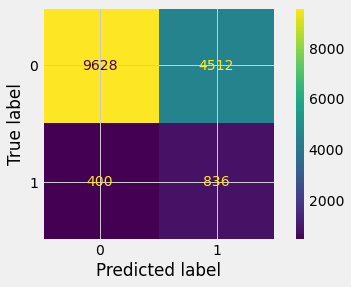

In [125]:
plot_confusion_matrix(Model, testX, testy)  
plt.show()

## Adjusting the classification threshold

In [139]:
def adjusted_classes(Probs, t = 0.34):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in Probs]

In [149]:
# generate new class predictions based on the adjusted_classes
# function above and view the resulting confusion matrix.
y_pred_adj = adjusted_classes(Probs, t = 0.34)
print(pd.DataFrame(confusion_matrix(testy, y_pred_adj),
                    columns=['pred_0', 'pred_1'], 
                    index=['0', '1']))

   pred_0  pred_1
0    5253    8887
1     113    1123


## Learning Curve

[ 3774  7548 11322 15096 18871 22645 26419 30193 33967 37742]


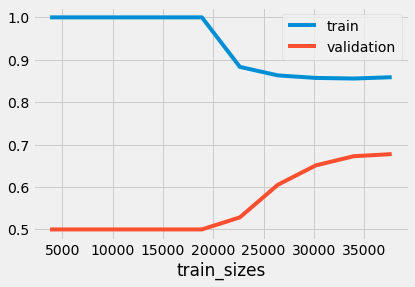

In [152]:
N, train_score, val_score = learning_curve(Model, trainX, trainy,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [151]:
 pd.DataFrame(trainX).to_csv('trainX.csv',index=False)
 pd.DataFrame(testX).to_csv('testX.csv',index=False)
 pd.DataFrame(trainy).to_csv('trainy.csv',index=False)
 pd.DataFrame(testy).to_csv('testy.csv',index=False)